## Data Preparation

In [4]:
#Import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
filename = r'C:\Users\shachini dinushika\Documents\Data\loan_data_2007_2014.csv'
df = pd.read_csv(filename)

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\1284506676.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [6]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_data = df.copy()

In [8]:
loan_data =loan_data.drop(loan_data.columns[0],axis = 1) 

In [9]:
pd.options.display.max_columns = None

In [10]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Preprocess

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

#### General Preprocess

In [14]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [15]:
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace(r"\+ years", "", regex=True)  # Remove "+ years"
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(r"< 1 year", "0", regex=True)  # "< 1 year" to "0"
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(r"n/a", "0", regex=True)  # "n/a" to "0"
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(r" years", "", regex=True)  # Remove " years"
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(r" year", "", regex=True)  # Remove " year"

loan_data["emp_length_int"] = pd.to_numeric(loan_data["emp_length_int"], errors='coerce')


In [16]:
loan_data["emp_length_int"].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [17]:
loan_data["emp_length_int"] = loan_data["emp_length_int"].fillna(0)

In [18]:
#loan_data["emp_length_int"] =pd.to_numeric(loan_data["emp_length_int"])

In [19]:
loan_data["emp_length_int"].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [20]:
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line"],format = "%b-%y") 

In [21]:
type(loan_data["earliest_cr_line_date"][0])


pandas._libs.tslibs.timestamps.Timestamp

In [22]:
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line_date"])

loan_data["mnths_since_earliest_cr_line"] = (pd.to_datetime("2017-12-01") - loan_data["earliest_cr_line_date"]).dt.days / 30.44

loan_data["mnths_since_earliest_cr_line"] = loan_data["mnths_since_earliest_cr_line"].round()



In [23]:
loan_data["mnths_since_earliest_cr_line"].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mnths_since_earliest_cr_line, dtype: float64

In [24]:
loan_data.loc[:,["earliest_cr_line","earliest_cr_line_date","mnths_since_earliest_cr_line"]][loan_data["mnths_since_earliest_cr_line"]< 0]

,earliest_cr_line,earliest_cr_line_date,mnths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [25]:
loan_data.loc[loan_data["mnths_since_earliest_cr_line"] < 0, "mnths_since_earliest_cr_line"] = loan_data["mnths_since_earliest_cr_line"].max()

In [26]:
loan_data["term"].unique()
loan_data["term_int"] = loan_data["term"].str.replace("months","")

In [27]:
# Convert 'issue_d' to datetime
loan_data["issue_d_date"] = pd.to_datetime(loan_data["issue_d"], format="%b-%y")

# Calculate the difference in days
loan_data["mnths_since_issue_d"] = (pd.to_datetime("2017-12-01") - loan_data["issue_d_date"]).dt.days / 30.44

# Round the result if necessary
loan_data["mnths_since_issue_d"] = loan_data["mnths_since_issue_d"].round()

In [28]:
loan_data["mnths_since_issue_d"].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mnths_since_issue_d, dtype: float64

In [29]:
loan_data_dummies = [pd.get_dummies(loan_data["grade"], prefix= "grade", prefix_sep = ":"),
                     pd.get_dummies(loan_data["sub_grade"], prefix= "sub_grade", prefix_sep = ":"),
                     pd.get_dummies(loan_data["home_ownership"], prefix= "home_ownership", prefix_sep = ":"),
                     pd.get_dummies(loan_data["verification_status"], prefix= "verification_status", prefix_sep = ":"),
                     pd.get_dummies(loan_data["loan_status"], prefix= "loan_status", prefix_sep = ":"),
                     pd.get_dummies(loan_data["purpose"], prefix= "purpose", prefix_sep = ":"),
                     pd.get_dummies(loan_data["addr_state"], prefix= "addr_state", prefix_sep = ":"),
                     pd.get_dummies(loan_data["initial_list_status"], prefix= "initial_list_status", prefix_sep = ":")
                    ]

In [30]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [31]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [32]:
###Check for missing values 
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [33]:
# Replace missing values in 'total_rev_hi_lim' with 'funded_amnt'
loan_data["total_rev_hi_lim"] = loan_data["total_rev_hi_lim"].fillna(loan_data["funded_amnt"])

# Replace missing values in 'annual_inc' with the mean of 'annual_inc'
loan_data["annual_inc"] = loan_data["annual_inc"].fillna(loan_data["annual_inc"].mean())

In [34]:
cols_to_fill = ["mnths_since_earliest_cr_line", "acc_now_delinq", "total_acc", 
                "pub_rec", "open_acc", "inq_last_6mths", "delinq_2yrs", 
                "emp_length_int"]

loan_data.loc[:, cols_to_fill] = loan_data[cols_to_fill].fillna(0)

## PD model

### Data Preparation

In [66]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [67]:
loan_data["loan_status"].value_counts()/loan_data["loan_status"].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [68]:
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(["Charged Off","Late (31-120 days) ", "Default  ",
                                                                "Does not meet the credit policy. Status:Charged Off  ",
                                                               ]),0,1)

#### split data

In [70]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split( loan_data.drop( "good_bad",axis = 1 ), loan_data["good_bad"], test_size=0.2, random_state = 42 )


In [71]:
print("loan_data_inputs_train :", loan_data_inputs_train.shape)
print("loan_data_targets_train :", loan_data_targets_train.shape)
print("loan_data_inputs_test :", loan_data_inputs_test.shape)
print("loan_data_targets_test :", loan_data_targets_test.shape)


loan_data_inputs_train : (373028, 206)
loan_data_targets_train : (373028,)
loan_data_inputs_test : (93257, 206)
loan_data_targets_test : (93257,)


#### Data pre-processing 

#### categorical(discrete) 

In [74]:
#df_input_prepr = loan_data_inputs_train
#df_target_prepr = loan_data_targets_train

In [75]:
df_input_prepr = loan_data_inputs_test
df_target_prepr = loan_data_targets_test

In [76]:
loan_data_targets_train.head()

427211    1
206088    1
136020    1
412305    1
36159     0
Name: good_bad, dtype: int32

#### Calculating WoE for one variable

In [78]:
df_input_prepr["grade"].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [79]:
df1 = pd.concat([df_input_prepr["grade"],df_target_prepr],axis = 1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [80]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1.head()

,grade,good_bad,grade,good_bad
0,A,15108,A,0.967302
1,B,27199,B,0.934703
2,C,25048,C,0.901988
3,D,15390,D,0.873164
4,E,7145,E,0.840308


In [81]:
df1 = df1.iloc[:,[0,1,3]]
df1.head()

,grade,good_bad,good_bad
0,A,15108,0.967302
1,B,27199,0.934703
2,C,25048,0.901988
3,D,15390,0.873164
4,E,7145,0.840308


In [82]:
df1.columns = [df1.columns.values[0],"n_obs","prop_good"]
df1

,grade,n_obs,prop_good
0,A,15108,0.967302
1,B,27199,0.934703
2,C,25048,0.901988
3,D,15390,0.873164
4,E,7145,0.840308
5,F,2699,0.815487
6,G,668,0.770958


In [83]:
df1["prop_n_obs"] = df1["n_obs"]/df1["n_obs"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.967302,0.162004
1,B,27199,0.934703,0.291656
2,C,25048,0.901988,0.268591
3,D,15390,0.873164,0.165028
4,E,7145,0.840308,0.076616
5,F,2699,0.815487,0.028942
6,G,668,0.770958,0.007163


In [84]:
df1["n_good"] = df1["prop_good"]*df1["n_obs"]
df1["n_bad"] = (1-df1["prop_good"])*df1["n_obs"]
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.967302,0.162004,14614.0,494.0
1,B,27199,0.934703,0.291656,25423.0,1776.0
2,C,25048,0.901988,0.268591,22593.0,2455.0
3,D,15390,0.873164,0.165028,13438.0,1952.0
4,E,7145,0.840308,0.076616,6004.0,1141.0
5,F,2699,0.815487,0.028942,2201.0,498.0
6,G,668,0.770958,0.007163,515.0,153.0


In [85]:
df1["prop_n_good"] = df1["n_good"]/df1["n_good"].sum()
df1["prop_n_bad"] = df1["n_bad"]/df1["n_bad"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.967302,0.162004,14614.0,494.0,0.172359,0.058330
1,B,27199,0.934703,0.291656,25423.0,1776.0,0.299842,0.209706
2,C,25048,0.901988,0.268591,22593.0,2455.0,0.266465,0.289881
3,D,15390,0.873164,0.165028,13438.0,1952.0,0.158489,0.230488
4,E,7145,0.840308,0.076616,6004.0,1141.0,0.070812,0.134727
5,F,2699,0.815487,0.028942,2201.0,498.0,0.025959,0.058803
6,G,668,0.770958,0.007163,515.0,153.0,0.006074,0.018066


In [86]:
df1["WoE"] = np.log( df1["prop_n_good"] / df1["prop_n_bad"] ) 
df1


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.967302,0.162004,14614.0,494.0,0.172359,0.058330,1.083458
1,B,27199,0.934703,0.291656,25423.0,1776.0,0.299842,0.209706,0.357549
2,C,25048,0.901988,0.268591,22593.0,2455.0,0.266465,0.289881,-0.084228
3,D,15390,0.873164,0.165028,13438.0,1952.0,0.158489,0.230488,-0.374510
4,E,7145,0.840308,0.076616,6004.0,1141.0,0.070812,0.134727,-0.643221
5,F,2699,0.815487,0.028942,2201.0,498.0,0.025959,0.058803,-0.817675
6,G,668,0.770958,0.007163,515.0,153.0,0.006074,0.018066,-1.090013


In [87]:
df1 = df1.sort_values(["WoE"])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.770958,0.007163,515.0,153.0,0.006074,0.018066,-1.090013
1,F,2699,0.815487,0.028942,2201.0,498.0,0.025959,0.058803,-0.817675
2,E,7145,0.840308,0.076616,6004.0,1141.0,0.070812,0.134727,-0.643221
3,D,15390,0.873164,0.165028,13438.0,1952.0,0.158489,0.230488,-0.374510
4,C,25048,0.901988,0.268591,22593.0,2455.0,0.266465,0.289881,-0.084228
5,B,27199,0.934703,0.291656,25423.0,1776.0,0.299842,0.209706,0.357549
6,A,15108,0.967302,0.162004,14614.0,494.0,0.172359,0.058330,1.083458


In [88]:
df1["diff_prop_good"] = df1["prop_good"].diff().abs()
df1["diff_WoE"] = df1["WoE"].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,668,0.770958,0.007163,515.0,153.0,0.006074,0.018066,-1.090013,NaN,NaN
1,F,2699,0.815487,0.028942,2201.0,498.0,0.025959,0.058803,-0.817675,0.044529,0.272338
2,E,7145,0.840308,0.076616,6004.0,1141.0,0.070812,0.134727,-0.643221,0.024821,0.174454
3,D,15390,0.873164,0.165028,13438.0,1952.0,0.158489,0.230488,-0.374510,0.032856,0.268711
4,C,25048,0.901988,0.268591,22593.0,2455.0,0.266465,0.289881,-0.084228,0.028824,0.290281
5,B,27199,0.934703,0.291656,25423.0,1776.0,0.299842,0.209706,0.357549,0.032715,0.441777
6,A,15108,0.967302,0.162004,14614.0,494.0,0.172359,0.058330,1.083458,0.032599,0.725909


In [89]:
df1["IV"] = (df1["prop_n_good"] - df1["prop_n_bad"] ) * df1["WoE"]
df1["IV"] = df1["IV"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.770958,0.007163,515.0,153.0,0.006074,0.018066,-1.090013,NaN,NaN,0.265748
1,F,2699,0.815487,0.028942,2201.0,498.0,0.025959,0.058803,-0.817675,0.044529,0.272338,0.265748
2,E,7145,0.840308,0.076616,6004.0,1141.0,0.070812,0.134727,-0.643221,0.024821,0.174454,0.265748
3,D,15390,0.873164,0.165028,13438.0,1952.0,0.158489,0.230488,-0.374510,0.032856,0.268711,0.265748
4,C,25048,0.901988,0.268591,22593.0,2455.0,0.266465,0.289881,-0.084228,0.028824,0.290281,0.265748
5,B,27199,0.934703,0.291656,25423.0,1776.0,0.299842,0.209706,0.357549,0.032715,0.441777,0.265748
6,A,15108,0.967302,0.162004,14614.0,494.0,0.172359,0.058330,1.083458,0.032599,0.725909,0.265748


#### Automating the WoE calculation

In [91]:
def woe_discrete(df,discrete_var_name,good_bad_var_df):
    df = pd.concat([df[discrete_var_name],good_bad_var_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],"n_obs","prop_good"]
    df["prop_n_obs"] = df["n_obs"]/df["n_obs"].sum()
    df["n_good"] = df["prop_good"]*df["n_obs"]
    df["n_bad"] = (1-df["prop_good"])*df["n_obs"]
    df["prop_n_good"] = df["n_good"]/df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"]/df["n_bad"].sum()
    df["WoE"] = np.log( df["prop_n_good"] / df["prop_n_bad"] ) 
    df = df.sort_values(["WoE"])
    df = df.reset_index(drop = True)
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"] ) * df["WoE"]
    df["IV"] = df["IV"].sum()
    
    return df 
    

In [92]:
df_temp = woe_discrete(df_input_prepr,"grade",df_target_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,G,668,0.770958,0.007163,515.0,153.0,0.006074,0.018066,-1.090013,0.265748
1,F,2699,0.815487,0.028942,2201.0,498.0,0.025959,0.058803,-0.817675,0.265748
2,E,7145,0.840308,0.076616,6004.0,1141.0,0.070812,0.134727,-0.643221,0.265748
3,D,15390,0.873164,0.165028,13438.0,1952.0,0.158489,0.230488,-0.374510,0.265748
4,C,25048,0.901988,0.268591,22593.0,2455.0,0.266465,0.289881,-0.084228,0.265748
5,B,27199,0.934703,0.291656,25423.0,1776.0,0.299842,0.209706,0.357549,0.265748
6,A,15108,0.967302,0.162004,14614.0,494.0,0.172359,0.058330,1.083458,0.265748


In [93]:
sns.set()

def plot_by_woe(df_WoE,rotation_of_x_ax_lbl = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE["WoE"]
    plt.figure(figsize = (18,6))
    plt.plot(x,y,marker = "o",linestyle  = "--",color = "k")
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title (str("Weight of Evidence by "+ df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_ax_lbl)
    
    return plot_by_woe
   

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

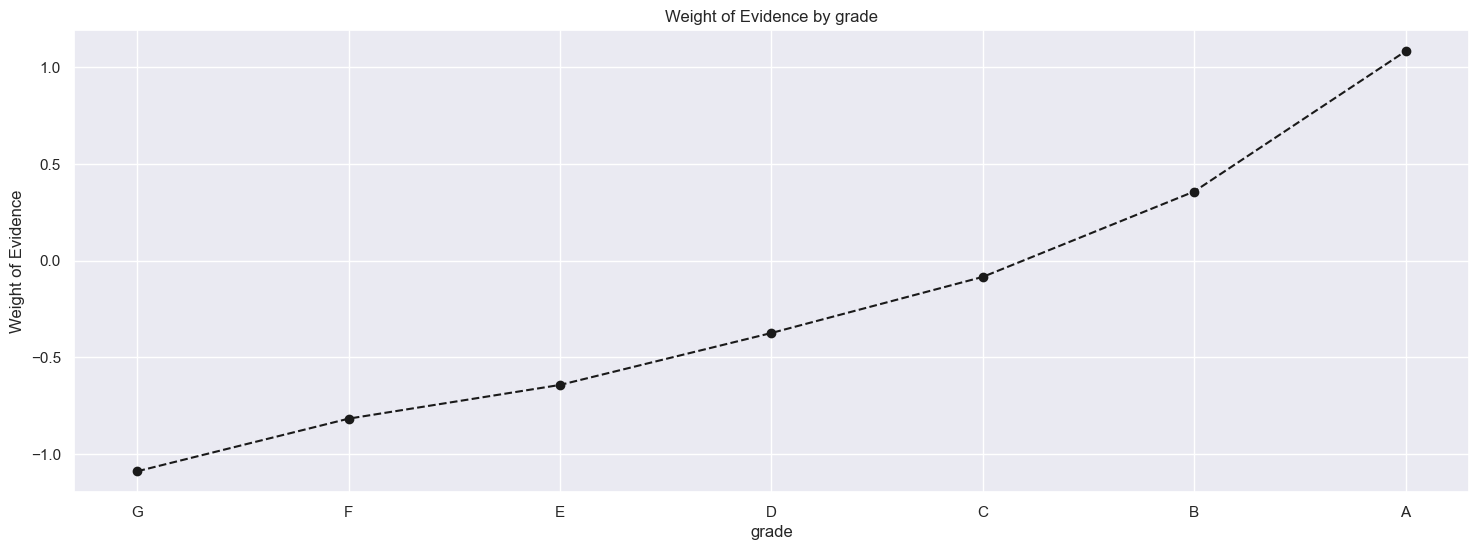

In [94]:
plot_by_woe(df_temp)

In [95]:
df_temp = woe_discrete(df_input_prepr,"home_ownership",df_target_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,OTHER,45,0.844444,0.000483,38.0,7.0,0.000448,0.000827,-0.612066,0.024623
1,RENT,37874,0.894334,0.406125,33872.0,4002.0,0.399490,0.472547,-0.167947,0.024623
2,NONE,10,0.900000,0.000107,9.0,1.0,0.000106,0.000118,-0.106517,0.024623
3,OWN,8409,0.907361,0.090170,7630.0,779.0,0.089989,0.091983,-0.021910,0.024623
4,MORTGAGE,46919,0.921567,0.503115,43239.0,3680.0,0.509966,0.434526,0.160089,0.024623


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

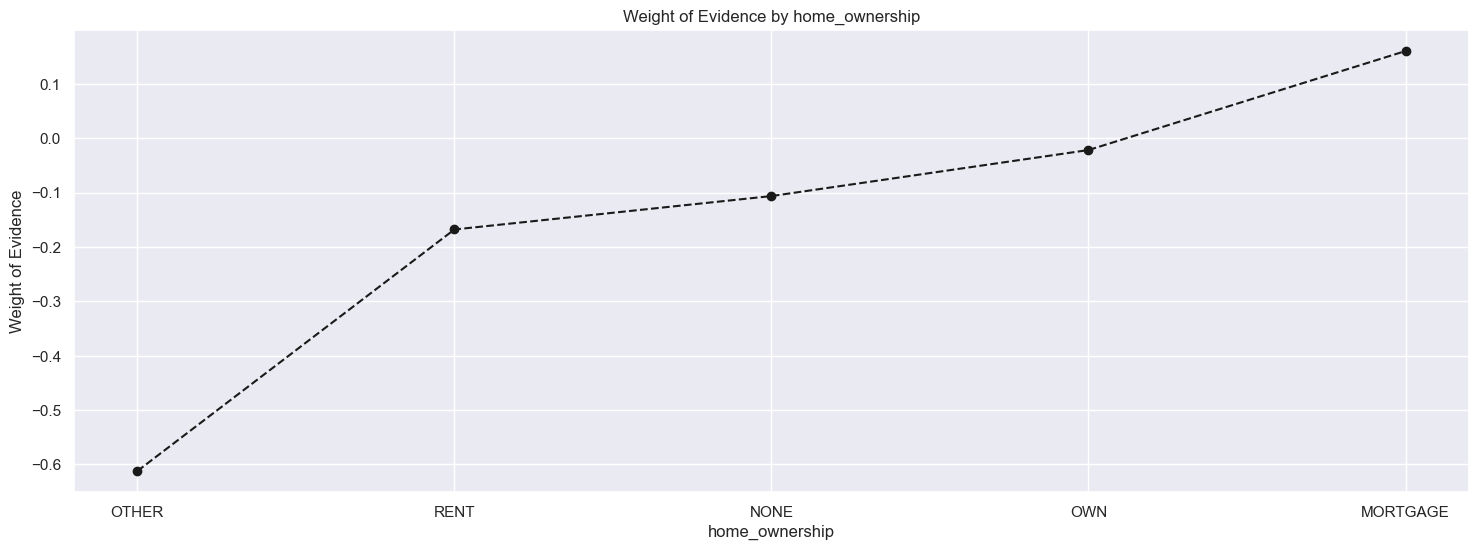

In [96]:
plot_by_woe(df_temp)

In [97]:
df_input_prepr["home_ownership:RENT_OTHER_NONE_ANY"] = sum([ df_input_prepr["home_ownership:RENT"],
                                                             df_input_prepr["home_ownership:OTHER"],
                                                             df_input_prepr["home_ownership:NONE"],
                                                             df_input_prepr["home_ownership:ANY"] ])

In [98]:
df_temp = woe_discrete(df_input_prepr,"addr_state",df_target_prepr)
df_temp


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000118,-2.303742,inf
1,NV,1298,0.883667,0.013919,1147.0,151.0,0.013528,0.017830,-0.276116,inf
2,HI,486,0.888889,0.005211,432.0,54.0,0.005095,0.006376,-0.224300,inf
3,LA,1130,0.889381,0.012117,1005.0,125.0,0.011853,0.014760,-0.219313,inf
4,FL,6426,0.890912,0.068906,5725.0,701.0,0.067521,0.082772,-0.203652,inf
5,AL,1182,0.893401,0.012675,1056.0,126.0,0.012455,0.014878,-0.177780,inf
6,NJ,3676,0.893634,0.039418,3285.0,391.0,0.038744,0.046168,-0.175327,inf
7,RI,403,0.898263,0.004321,362.0,41.0,0.004269,0.004841,-0.125669,inf
8,MI,2358,0.899067,0.025285,2120.0,238.0,0.025004,0.028102,-0.116841,inf
9,NY,8031,0.899390,0.086117,7223.0,808.0,0.085189,0.095407,-0.113278,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

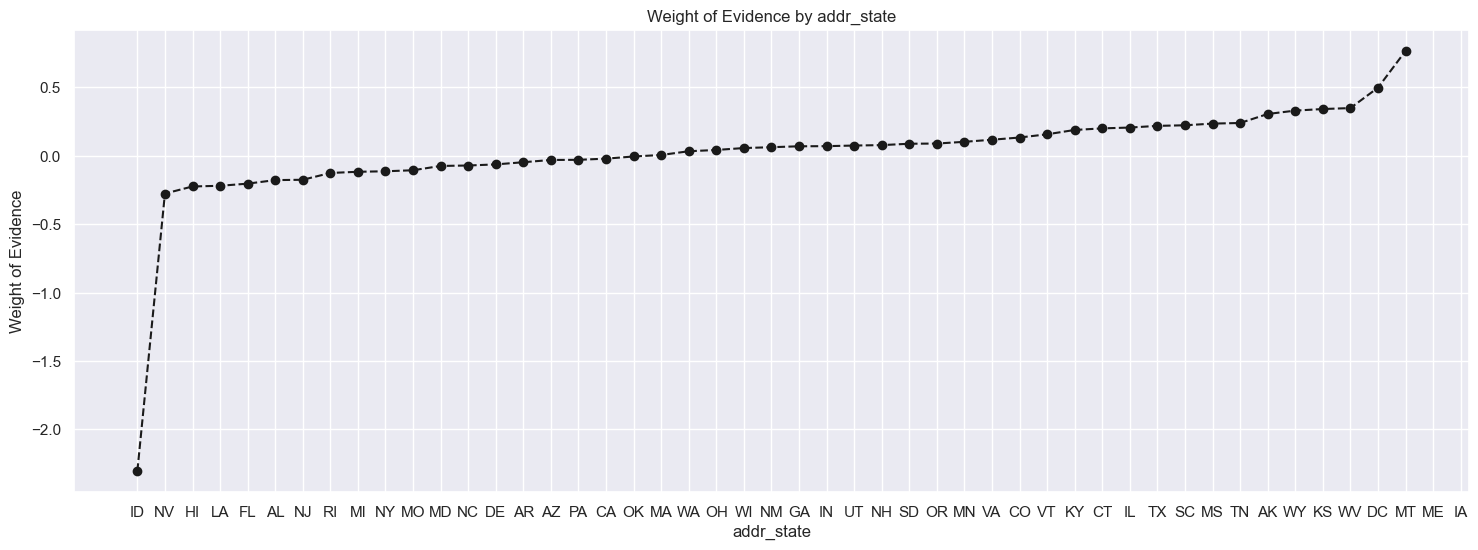

In [99]:
plot_by_woe(df_temp)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

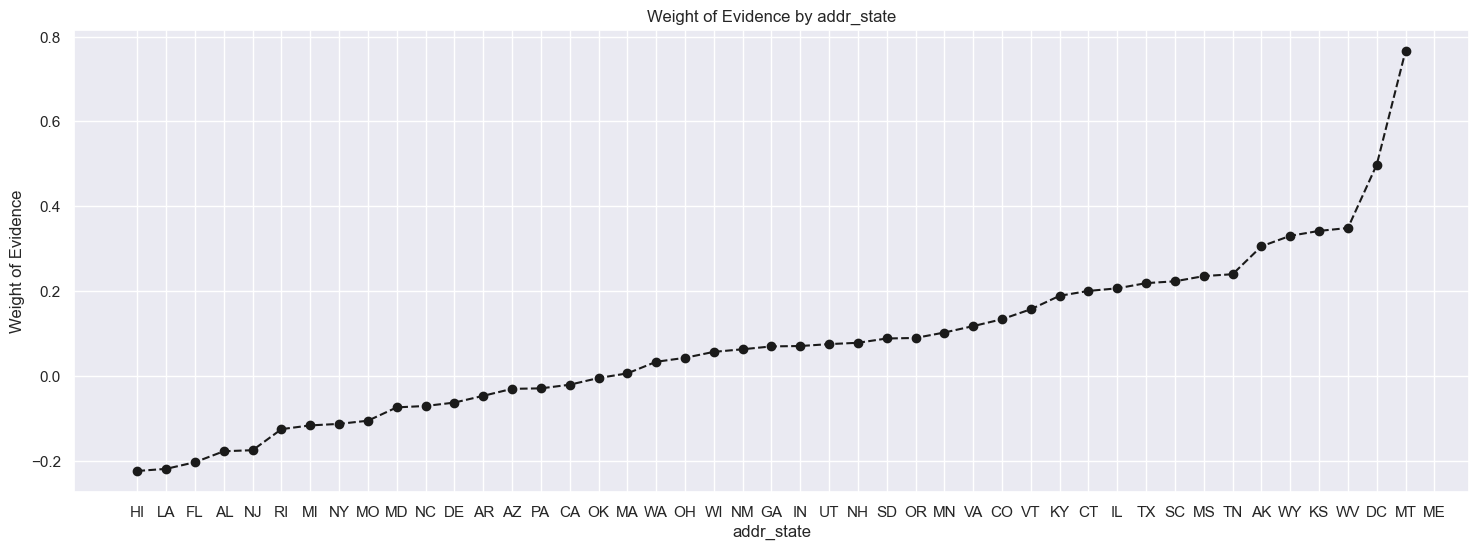

In [100]:
plot_by_woe(df_temp.iloc[2:-2, :])

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

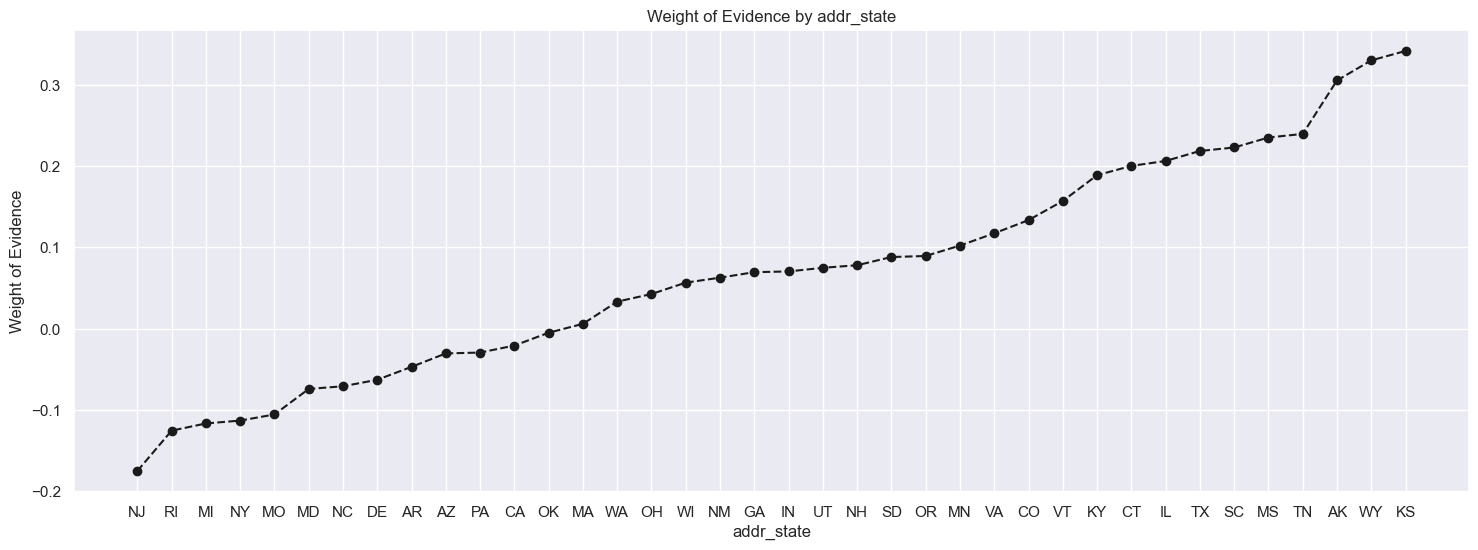

In [101]:
plot_by_woe(df_temp.iloc[6:-6, :])

In [102]:
if ['addr_state:ND'] in df_input_prepr.columns.values:
    pass
else:
    df_input_prepr['addr_state:ND'] = 0

In [103]:
df_input_prepr["addr_state:ND_NE_IA_NV_FL_HI_AL"] = sum([ df_input_prepr["addr_state:ND"],
                                                          df_input_prepr["addr_state:NE"],
                                                          df_input_prepr["addr_state:IA"],
                                                          df_input_prepr["addr_state:NV"],
                                                          df_input_prepr["addr_state:FL"],
                                                          df_input_prepr["addr_state:HI"],
                                                          df_input_prepr["addr_state:AL"]
                                                        ])

df_input_prepr["addr_state:NM_VA"] = sum([ df_input_prepr["addr_state:NM"],
                                df_input_prepr["addr_state:VA"] ])

df_input_prepr["addr_state:OK_TN_MO_LA_MD_NC"] = sum([ df_input_prepr["addr_state:OK"],
                                            df_input_prepr["addr_state:TN"],
                                            df_input_prepr["addr_state:MO"],
                                            df_input_prepr["addr_state:LA"],
                                            df_input_prepr["addr_state:MD"],
                                            df_input_prepr["addr_state:NC"]])


df_input_prepr["addr_state:UT_KY_AZ_NJ"] = sum([ df_input_prepr["addr_state:UT"],
                                      df_input_prepr["addr_state:KY"],
                                      df_input_prepr["addr_state:AZ"],
                                      df_input_prepr["addr_state:NJ"]
                                     ])

df_input_prepr["addr_state:AR_MI_PA_OH_MN"] = sum([ df_input_prepr["addr_state:AR"],
                                         df_input_prepr["addr_state:MI"],
                                         df_input_prepr["addr_state:PA"],
                                         df_input_prepr["addr_state:OH"],
                                         df_input_prepr["addr_state:MN"]
                                     ])

df_input_prepr["addr_state:RI_MA_DE_SD_IN"] = sum([ df_input_prepr["addr_state:RI"],
                                         df_input_prepr["addr_state:MA"],
                                         df_input_prepr["addr_state:DE"],
                                         df_input_prepr["addr_state:SD"],
                                         df_input_prepr["addr_state:IN"]
                                     ])



df_input_prepr["addr_state:GA_WA_OR"] = sum([ df_input_prepr["addr_state:GA"],
                                   df_input_prepr["addr_state:WA"],
                                   df_input_prepr["addr_state:OR"]
                                     ])

df_input_prepr["addr_state:WI_MT"] = sum([ df_input_prepr["addr_state:WI"],
                                df_input_prepr["addr_state:MT"]
                                ])

df_input_prepr["addr_state:IL_CT"] = sum([ df_input_prepr["addr_state:IL"],
                                df_input_prepr["addr_state:CT"]
                                ])


df_input_prepr["addr_state:KS_SC_CO_VT_AK_MS"] = sum([ df_input_prepr["addr_state:KS"],
                                            df_input_prepr["addr_state:SC"],
                                            df_input_prepr["addr_state:CO"],
                                            df_input_prepr["addr_state:VT"],
                                            df_input_prepr["addr_state:AK"],
                                            df_input_prepr["addr_state:MS"]
                                     ])

df_input_prepr["addr_state:WV_NH_WY_DC_ME_ID"] = sum([ df_input_prepr["addr_state:WV"],
                                            df_input_prepr["addr_state:NH"],
                                            df_input_prepr["addr_state:WY"],
                                            df_input_prepr["addr_state:DC"],
                                            df_input_prepr["addr_state:ME"],
                                            df_input_prepr["addr_state:ID"]
                                     ])


In [104]:
df_temp = woe_discrete(df_input_prepr,"verification_status",df_target_prepr)
df_temp


,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,Verified,33641,0.891680,0.360734,29997.0,3644.0,0.353788,0.430275,-0.195726,0.025283
1,Source Verified,29963,0.916597,0.321295,27464.0,2499.0,0.323914,0.295076,0.093244,0.025283
2,Not Verified,29653,0.921559,0.317971,27327.0,2326.0,0.322298,0.274649,0.159984,0.025283


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

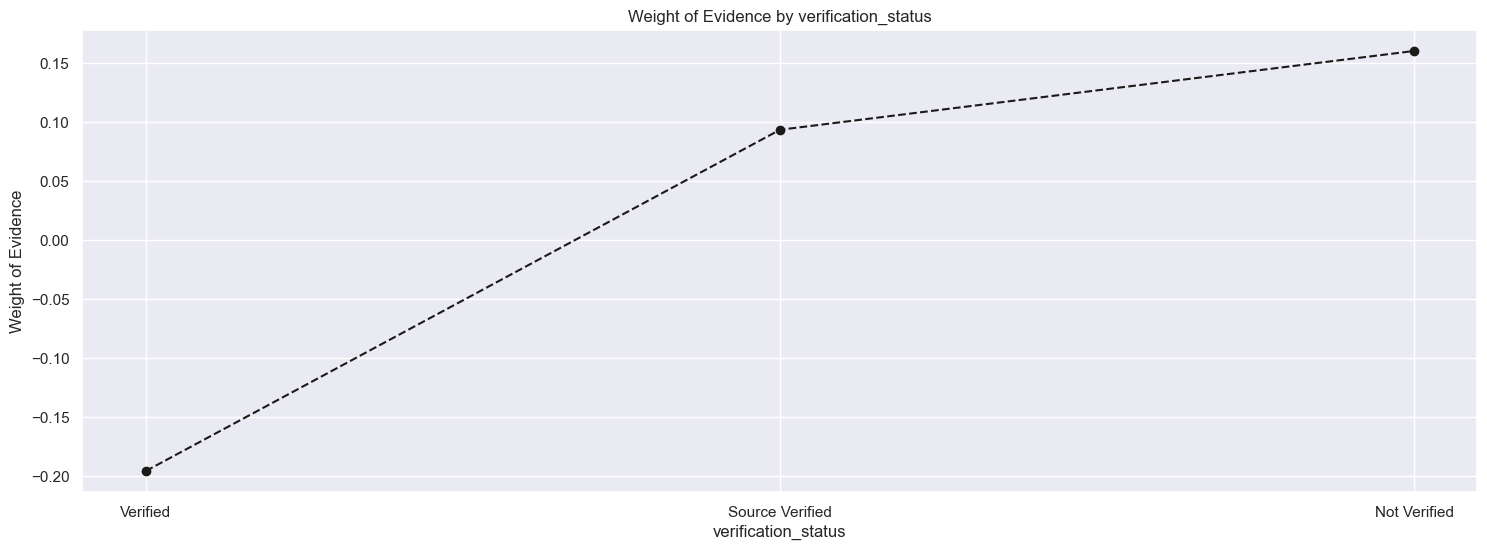

In [105]:
plot_by_woe(df_temp)

In [106]:
df_input_prepr["verification_status:Source_Ver_Verified"] = sum([ df_input_prepr["verification_status:Source Verified"],
                                                                  df_input_prepr["verification_status:Verified"]
                                                                ])

In [107]:
df_temp = woe_discrete(df_input_prepr,"purpose",df_target_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000637,0.001889,-1.087346,0.048522
1,small_business,1431,0.805730,0.015345,1153.0,278.0,0.013599,0.032826,-0.881240,0.048522
2,educational,89,0.842697,0.000954,75.0,14.0,0.000885,0.001653,-0.625311,0.048522
3,house,439,0.874715,0.004707,384.0,55.0,0.004529,0.006494,-0.360432,0.048522
4,medical,918,0.875817,0.009844,804.0,114.0,0.009482,0.013461,-0.350341,0.048522
5,wedding,456,0.879386,0.004890,401.0,55.0,0.004729,0.006494,-0.317113,0.048522
6,other,4806,0.883271,0.051535,4245.0,561.0,0.050066,0.066242,-0.279965,0.048522
7,moving,602,0.893688,0.006455,538.0,64.0,0.006345,0.007557,-0.174766,0.048522
8,vacation,496,0.895161,0.005319,444.0,52.0,0.005237,0.006140,-0.159161,0.048522
9,debt_consolidation,55012,0.905421,0.589897,49809.0,5203.0,0.587453,0.614358,-0.044781,0.048522


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

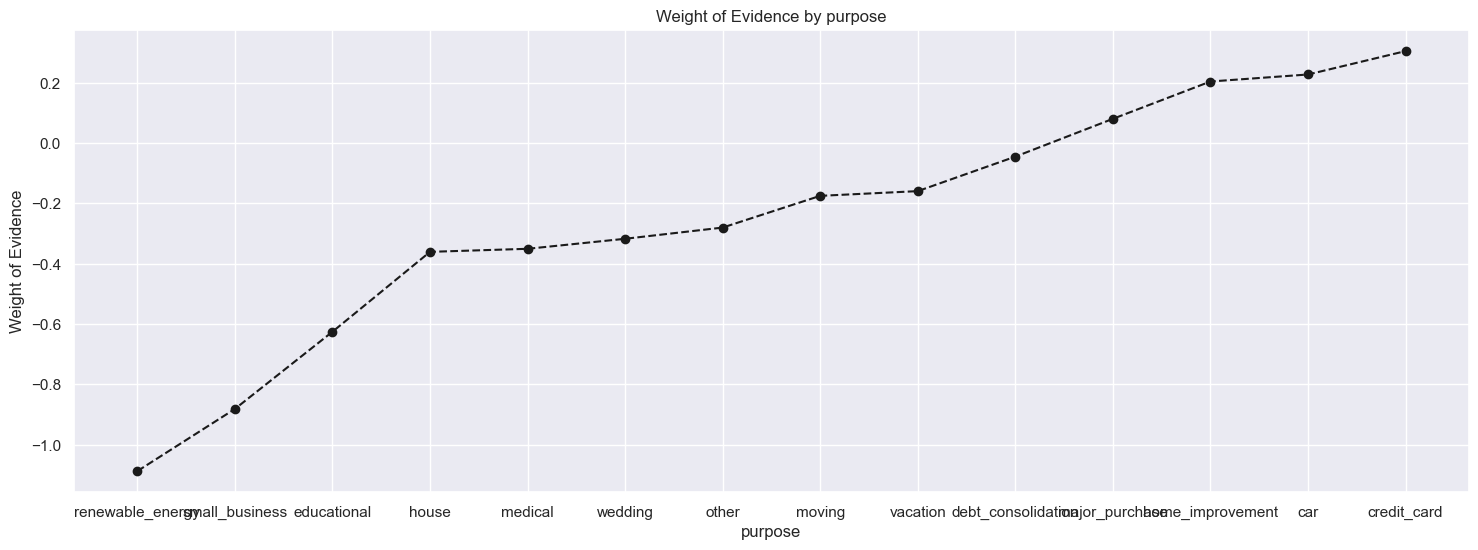

In [108]:
plot_by_woe(df_temp)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

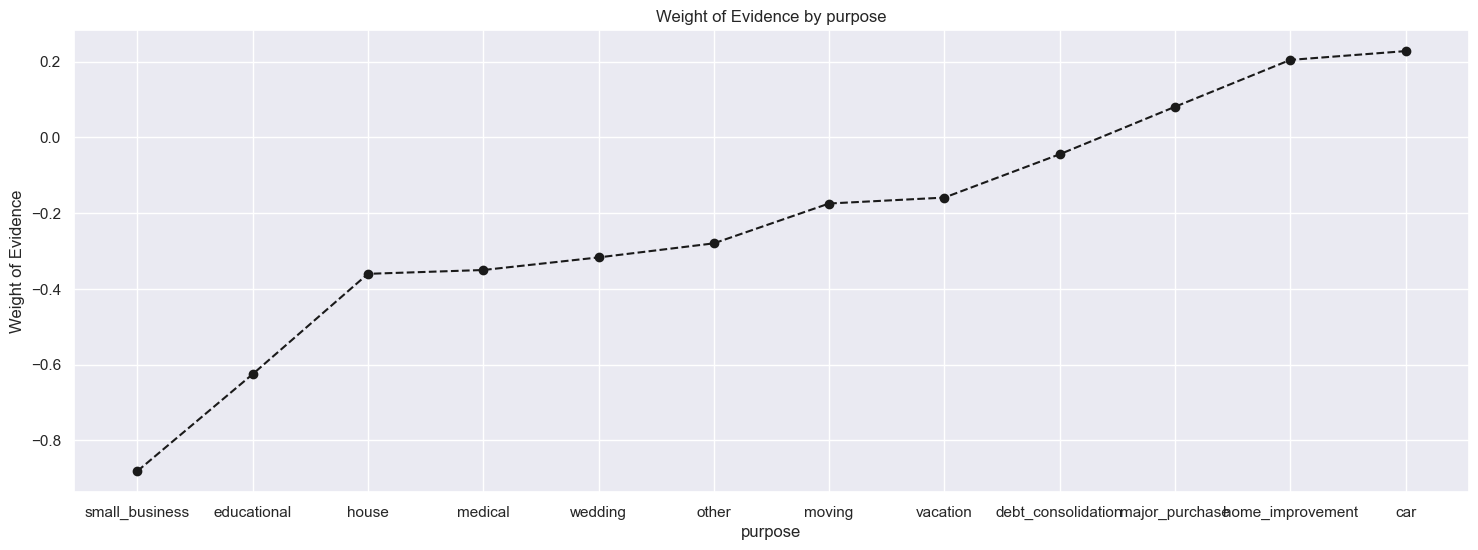

In [109]:
plot_by_woe(df_temp.iloc[1:-1,:])


In [110]:
df_input_prepr["purpose:educational_renewable_en_other"] = sum([ df_input_prepr["purpose:educational"],
                                                                 df_input_prepr["purpose:renewable_energy"],
                                                                 df_input_prepr["purpose:other"] 
                                                                ])
df_input_prepr["purpose:house_wedding_medical"] = sum([ df_input_prepr["purpose:house"],
                                                                 df_input_prepr["purpose:wedding"],
                                                                 df_input_prepr["purpose:medical"] 
                                                                ])
df_input_prepr["purpose:major_purchase_home_improvement"] = sum([ df_input_prepr["purpose:major_purchase"],
                                                                 df_input_prepr["purpose:home_improvement"]
                                                                ])


In [111]:

df_temp = woe_discrete(df_input_prepr,"initial_list_status",df_target_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,f,60491,0.897026,0.648648,54262.0,6229.0,0.639973,0.735506,-0.139133,0.042751
1,w,32766,0.931636,0.351352,30526.0,2240.0,0.360027,0.264494,0.308361,0.042751


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

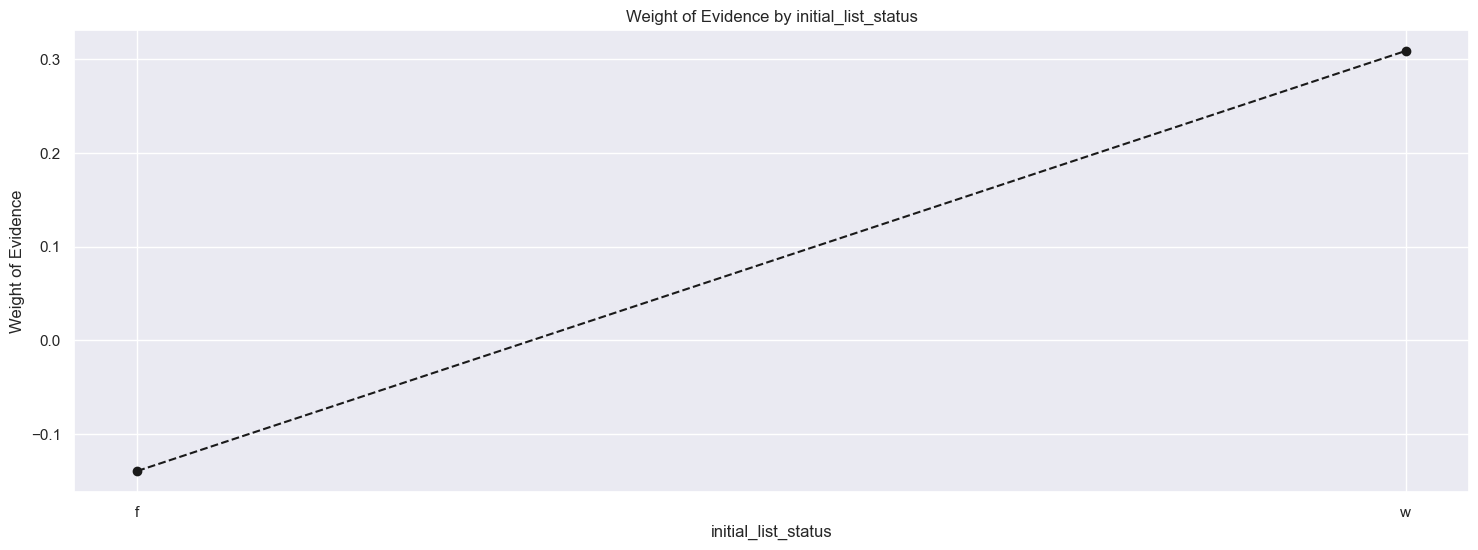

In [112]:
plot_by_woe(df_temp)

#### Continuous Variables 

In [114]:
def woe_continuous(df,continous_var_name,good_bad_var_df):
    df = pd.concat([df[continous_var_name],good_bad_var_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],"n_obs","prop_good"]
    df["prop_n_obs"] = df["n_obs"]/df["n_obs"].sum()
    df["n_good"] = df["prop_good"]*df["n_obs"]
    df["n_bad"] = (1-df["prop_good"])*df["n_obs"]
    df["prop_n_good"] = df["n_good"]/df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"]/df["n_bad"].sum()
    df["WoE"] = np.log( df["prop_n_good"] / df["prop_n_bad"] ) 
    #df = df.sort_values(["WoE"])
    #df = df.reset_index(drop = True)
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"] ) * df["WoE"]
    df["IV"] = df["IV"].sum()
    
    return df 

##### term_int

In [116]:
df_input_prepr["term_int"].unique()


array([' 60 ', ' 36 '], dtype=object)

In [117]:
df_temp = woe_continuous(df_input_prepr,"term_int",df_target_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,36,67534,0.918367,0.724171,62021.0,5513.0,0.731483,0.650962,0.116623,0.030508
1,60,25723,0.885083,0.275829,22767.0,2956.0,0.268517,0.349038,-0.262266,0.030508


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

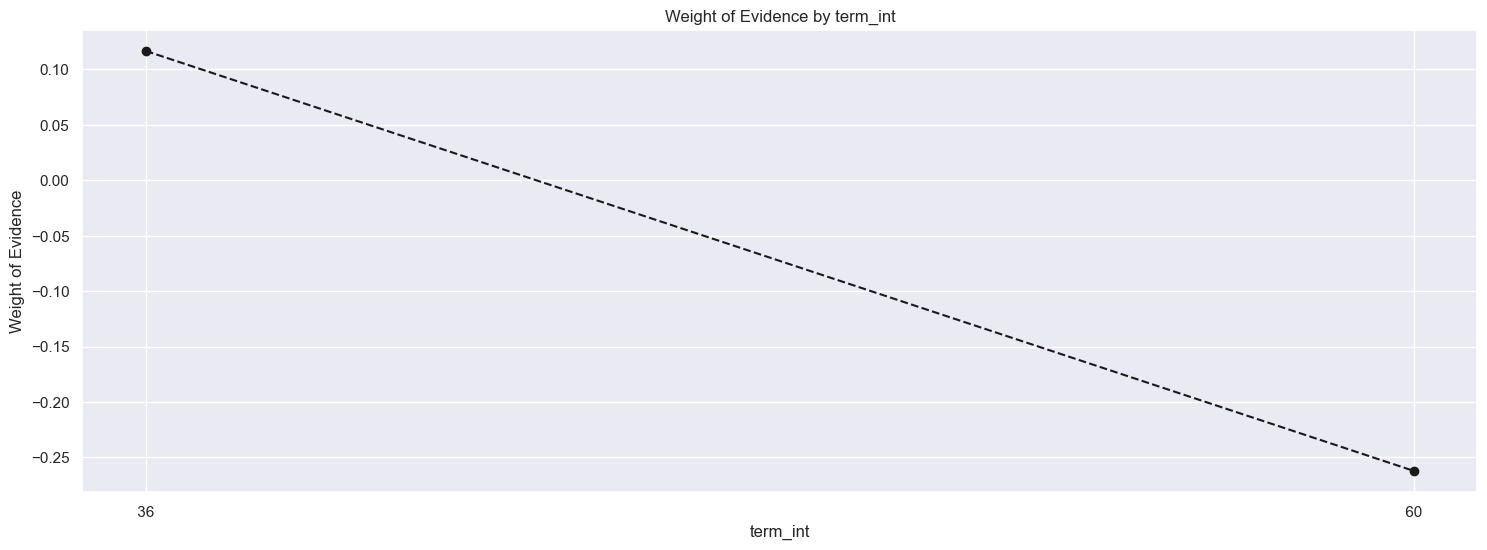

In [118]:
plot_by_woe(df_temp)

In [119]:
df_input_prepr["term_int:36"] = np.where(( df_input_prepr["term_int"] == 36 ),1,0)
df_input_prepr["term_int:60"] = np.where(( df_input_prepr["term_int"] == 60 ),1,0)

##### emp_length_int

In [121]:
df_input_prepr["emp_length_int"].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [122]:
df_temp = woe_continuous(df_input_prepr,"emp_length_int",df_target_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,11553,0.896823,0.123883,10361.0,1192.0,0.122199,0.140749,-0.141325,0.008051
1,1.0,5968,0.912534,0.063995,5446.0,522.0,0.064231,0.061637,0.041227,0.008051
2,2.0,8295,0.905485,0.088948,7511.0,784.0,0.088586,0.092573,-0.044027,0.008051
3,3.0,7391,0.907590,0.079254,6708.0,683.0,0.079115,0.080647,-0.019180,0.008051
4,4.0,5555,0.909991,0.059567,5055.0,500.0,0.059619,0.059039,0.009783,0.008051
5,5.0,6172,0.902301,0.066183,5569.0,603.0,0.065681,0.071201,-0.080688,0.008051
6,6.0,5225,0.898182,0.056028,4693.0,532.0,0.055350,0.062817,-0.126558,0.008051
7,7.0,5131,0.909764,0.055020,4668.0,463.0,0.055055,0.054670,0.007017,0.008051
8,8.0,4542,0.910392,0.048704,4135.0,407.0,0.048769,0.048058,0.014688,0.008051
9,9.0,3621,0.907484,0.038828,3286.0,335.0,0.038755,0.039556,-0.020446,0.008051


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

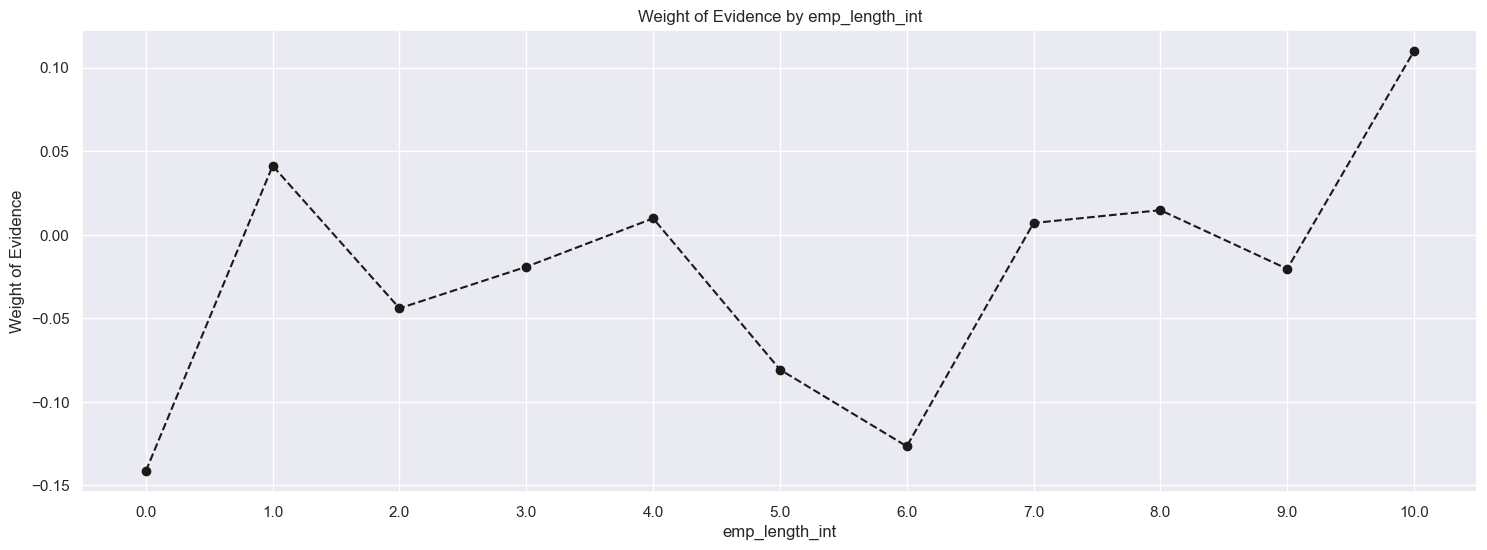

In [123]:
plot_by_woe(df_temp)

In [124]:
df_input_prepr["emp_length_int:0"]   = np.where( df_input_prepr["emp_length_int"].isin([0]) ,1,0)
df_input_prepr["emp_length_int:1"]   = np.where(df_input_prepr["emp_length_int"].isin([1]) ,1,0)
df_input_prepr["emp_length_int:2-4"] = np.where(df_input_prepr["emp_length_int"].isin(range(2,5)),1,0)
df_input_prepr["emp_length_int:5-6"] = np.where(df_input_prepr["emp_length_int"].isin(range(5,7)),1,0)
df_input_prepr["emp_length_int:7-9"] = np.where( df_input_prepr["emp_length_int"].isin(range(7,10)),1,0)
df_input_prepr["emp_length_int:10"]  = np.where(df_input_prepr["emp_length_int"].isin([10]) ,1,0)                                              


##### mnths_since_issue_d

In [126]:
##fine classing the variable into 50 categories
df_input_prepr["mnths_since_issue_d"] = df_input_prepr["mnths_since_issue_d"].fillna(df_input_prepr["mnths_since_issue_d"].mean())

In [127]:
df_input_prepr["mnths_since_issue_d_factor"] = pd.cut( df_input_prepr["mnths_since_issue_d"], 
                                                       bins = 50,
                                                       labels=False, 
                                                       include_lowest=True )

df_temp = woe_continuous(df_input_prepr,"mnths_since_issue_d_factor",df_target_prepr)
df_temp

,mnths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,7191,0.966347,0.077109,6949.0,242.0,0.081957,0.028575,1.053674,inf
1,1,9752,0.954573,0.104571,9309.0,443.0,0.109791,0.052308,0.741426,inf
2,2,9506,0.942878,0.101933,8963.0,543.0,0.105711,0.064116,0.500009,inf
3,3,7240,0.933702,0.077635,6760.0,480.0,0.079728,0.056677,0.341250,inf
4,4,7217,0.924345,0.077388,6671.0,546.0,0.078679,0.064470,0.199164,inf
5,5,3104,0.916237,0.033284,2844.0,260.0,0.033542,0.030700,0.088544,inf
6,6,6197,0.913507,0.066451,5661.0,536.0,0.066767,0.063290,0.053480,inf
7,7,5821,0.907232,0.062419,5281.0,540.0,0.062285,0.063762,-0.023440,inf
8,8,5021,0.893647,0.053840,4487.0,534.0,0.052920,0.063053,-0.175198,inf
9,9,4497,0.885924,0.048222,3984.0,513.0,0.046988,0.060574,-0.253976,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

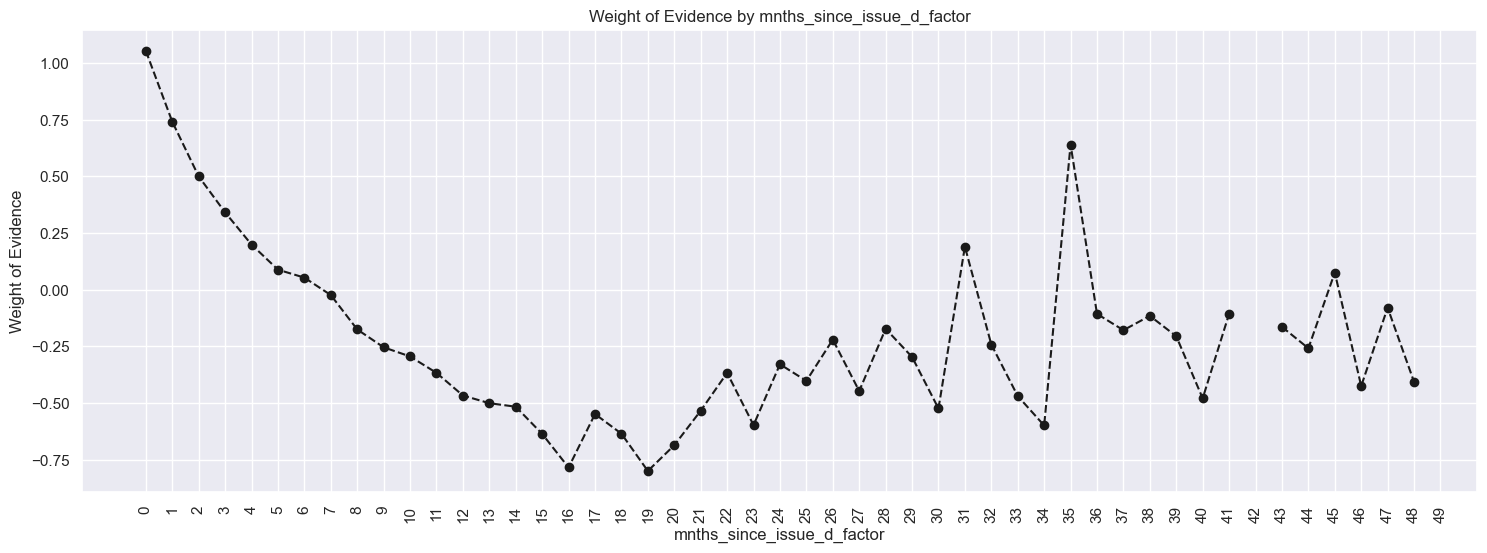

In [128]:
plot_by_woe(df_temp,90)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

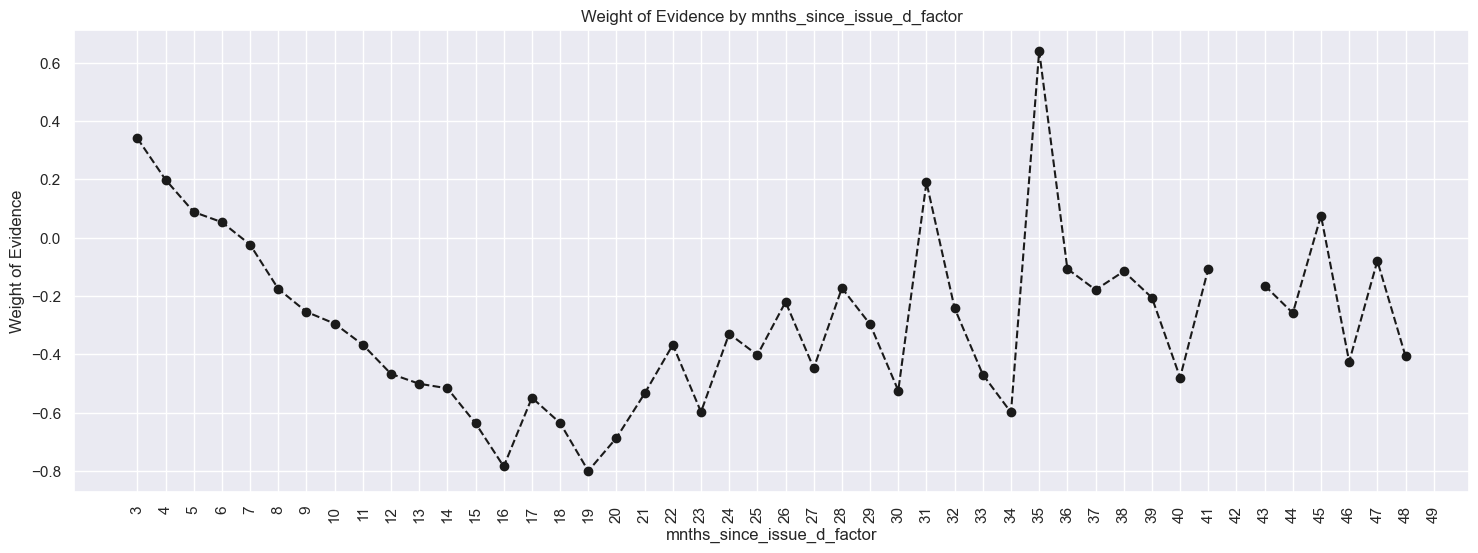

In [129]:
plot_by_woe(df_temp.loc[3:,:],90)

In [130]:
df_input_prepr["mnths_since_issue_d:<38"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(38)),1,0)
df_input_prepr["mnths_since_issue_d:38-39"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(38,40)),1,0)
df_input_prepr["mnths_since_issue_d:40-41"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(40,42)),1,0)
df_input_prepr["mnths_since_issue_d:42-48"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(42,49)),1,0)
df_input_prepr["mnths_since_issue_d:49-52"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(49,53)),1,0)
df_input_prepr["mnths_since_issue_d:53-64"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(53,65)),1,0)
df_input_prepr["mnths_since_issue_d:65-84"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(65,85)),1,0)
df_input_prepr["mnths_since_issue_d:>84"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(85,int(df_input_prepr["mnths_since_issue_d"].max()))),1,0)

##### int_rate_factor

In [132]:
##fine classing the variable into 50 categories
df_input_prepr["int_rate_factor"] = pd.cut( df_input_prepr["int_rate"],
                                            bins = 50,
                                            labels=False, 
                                            include_lowest=True )


df_temp = woe_continuous(df_input_prepr,"int_rate_factor",df_target_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,198,0.969697,0.002123,192.0,6.0,0.002264,0.000708,1.161994,0.367349
1,1,2086,0.980825,0.022368,2046.0,40.0,0.024131,0.004723,1.631021,0.367349
2,2,1974,0.976697,0.021167,1928.0,46.0,0.022739,0.005432,1.431855,0.367349
3,3,477,0.953878,0.005115,455.0,22.0,0.005366,0.002598,0.725513,0.367349
4,4,804,0.986318,0.008621,793.0,11.0,0.009353,0.001299,1.974186,0.367349
5,5,3245,0.969800,0.034796,3147.0,98.0,0.037116,0.011572,1.165496,0.367349
6,6,2429,0.956772,0.026046,2324.0,105.0,0.027410,0.012398,0.793343,0.367349
7,7,1680,0.975000,0.018015,1638.0,42.0,0.019319,0.004959,1.359820,0.367349
8,8,2384,0.949245,0.025564,2263.0,121.0,0.026690,0.014287,0.624915,0.367349
9,9,1590,0.984906,0.017050,1566.0,24.0,0.018470,0.002834,1.874484,0.367349


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

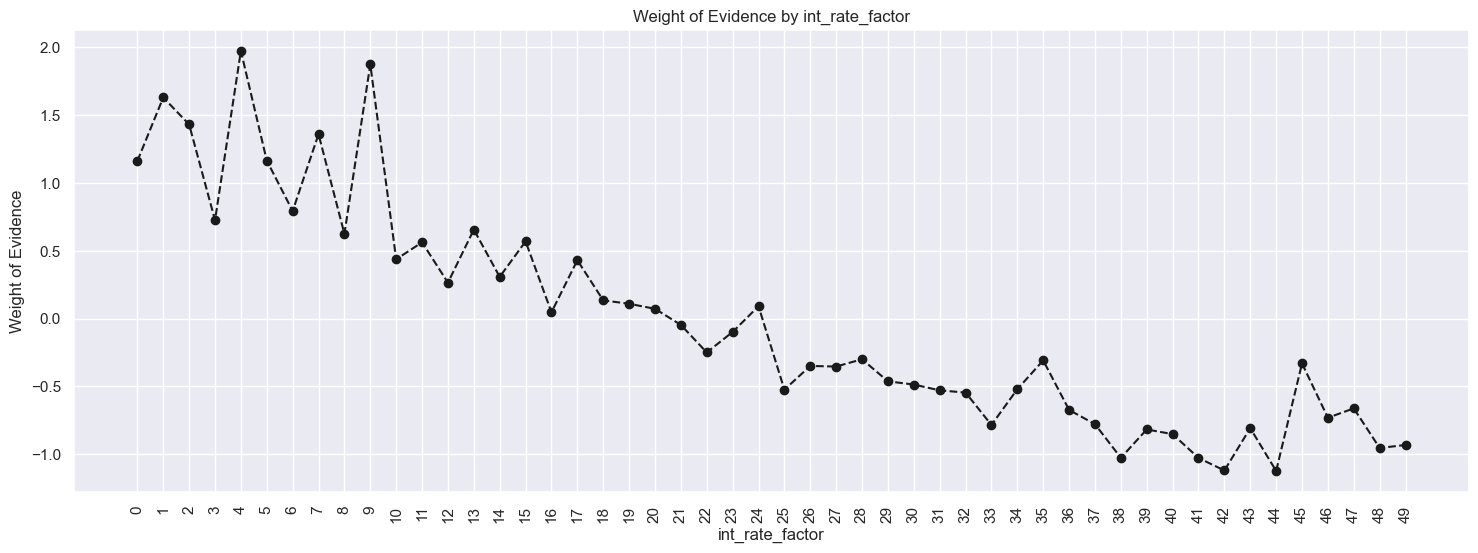

In [133]:
plot_by_woe(df_temp,90)

In [134]:
df_input_prepr["int_rate:<9.548"] = np.where(df_input_prepr["int_rate"] <= 9.548 ,1,0)
df_input_prepr["int_rate: 9.548-12.025"] = np.where((df_input_prepr["int_rate"] > 9.548) & (df_input_prepr["int_rate"] <= 12.025),1,0)
df_input_prepr["int_rate:12.025-15.327"] = np.where((df_input_prepr["int_rate"] > 12.025) & (df_input_prepr["int_rate"] <=  15.327),1,0)
df_input_prepr["int_rate:15.327-20.281"] = np.where((df_input_prepr["int_rate"] > 15.327) & (df_input_prepr["int_rate"] <=  20.281),1,0)
df_input_prepr["int_rate:>20"] = np.where((df_input_prepr["int_rate"] > 20.281),1,0)


##### funded_amnt_factor

In [136]:
##fine classing the variable into 50 categories
df_input_prepr["funded_amnt_factor"] = pd.cut( df_input_prepr["funded_amnt"],
                                               bins = 50,
                                               labels=False, 
                                               include_lowest=True )


df_temp = woe_continuous(df_input_prepr,"funded_amnt_factor",df_target_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,319,0.896552,0.003421,286.0,33.0,0.003373,0.003897,-0.144257,0.019414
1,1,800,0.901250,0.008578,721.0,79.0,0.008504,0.009328,-0.092550,0.019414
2,2,1513,0.914739,0.016224,1384.0,129.0,0.016323,0.015232,0.069179,0.019414
3,3,1817,0.904788,0.019484,1644.0,173.0,0.019390,0.020427,-0.052146,0.019414
4,4,1245,0.914056,0.013350,1138.0,107.0,0.013422,0.012634,0.060457,0.019414
5,5,2298,0.902524,0.024642,2074.0,224.0,0.024461,0.026449,-0.078153,0.019414
6,6,3957,0.914582,0.042431,3619.0,338.0,0.042683,0.039910,0.067166,0.019414
7,7,4186,0.919971,0.044887,3851.0,335.0,0.045419,0.039556,0.138216,0.019414
8,8,1718,0.898137,0.018422,1543.0,175.0,0.018198,0.020664,-0.127044,0.019414
9,9,2880,0.913542,0.030882,2631.0,249.0,0.031030,0.029401,0.053925,0.019414


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

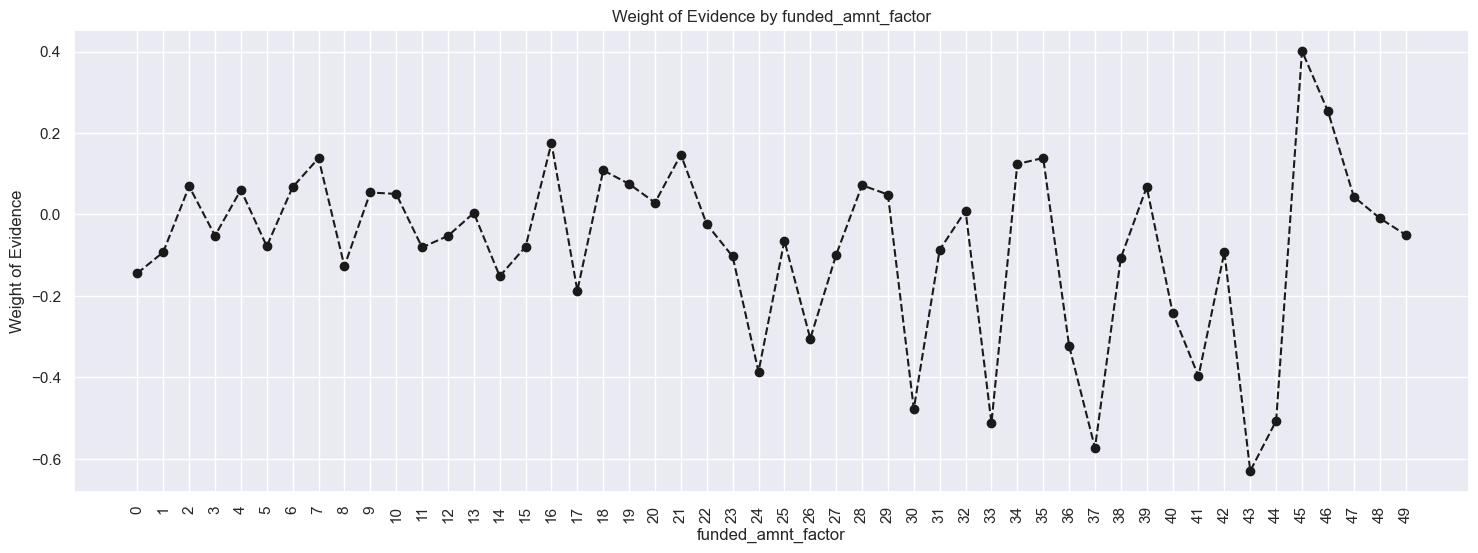

In [137]:
plot_by_woe(df_temp,90)

In [138]:
##In the above graph we cannot see a clear trend in the values for funded amount factor variable therefore, this will not be 
##considered for the model.

##### mnths_since_earliest_cr_line

In [140]:

df_input_prepr["mnths_since_earliest_cr_line_factor"] = pd.cut(df_input_prepr["mnths_since_earliest_cr_line"],
                                                               bins = 50,
                                                               labels=False, 
                                                               include_lowest=True )


df_temp = woe_continuous(df_input_prepr,"mnths_since_earliest_cr_line_factor",df_target_prepr)
df_temp

,mnths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,5,1.000000,0.000054,5.0,0.0,0.000059,0.000000,inf,inf
1,6,182,0.945055,0.001952,172.0,10.0,0.002029,0.001181,0.541168,inf
2,7,508,0.931102,0.005447,473.0,35.0,0.005579,0.004133,0.300006,inf
3,8,715,0.889510,0.007667,636.0,79.0,0.007501,0.009328,-0.217991,inf
4,9,1268,0.877760,0.013597,1113.0,155.0,0.013127,0.018302,-0.332352,inf
5,10,2314,0.898876,0.024813,2080.0,234.0,0.024532,0.027630,-0.118940,inf
6,11,2816,0.884233,0.030196,2490.0,326.0,0.029367,0.038493,-0.270601,inf
7,12,3366,0.901961,0.036094,3036.0,330.0,0.035807,0.038966,-0.084538,inf
8,13,3989,0.903485,0.042774,3604.0,385.0,0.042506,0.045460,-0.067185,inf
9,14,4857,0.905497,0.052082,4398.0,459.0,0.051871,0.054198,-0.043887,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

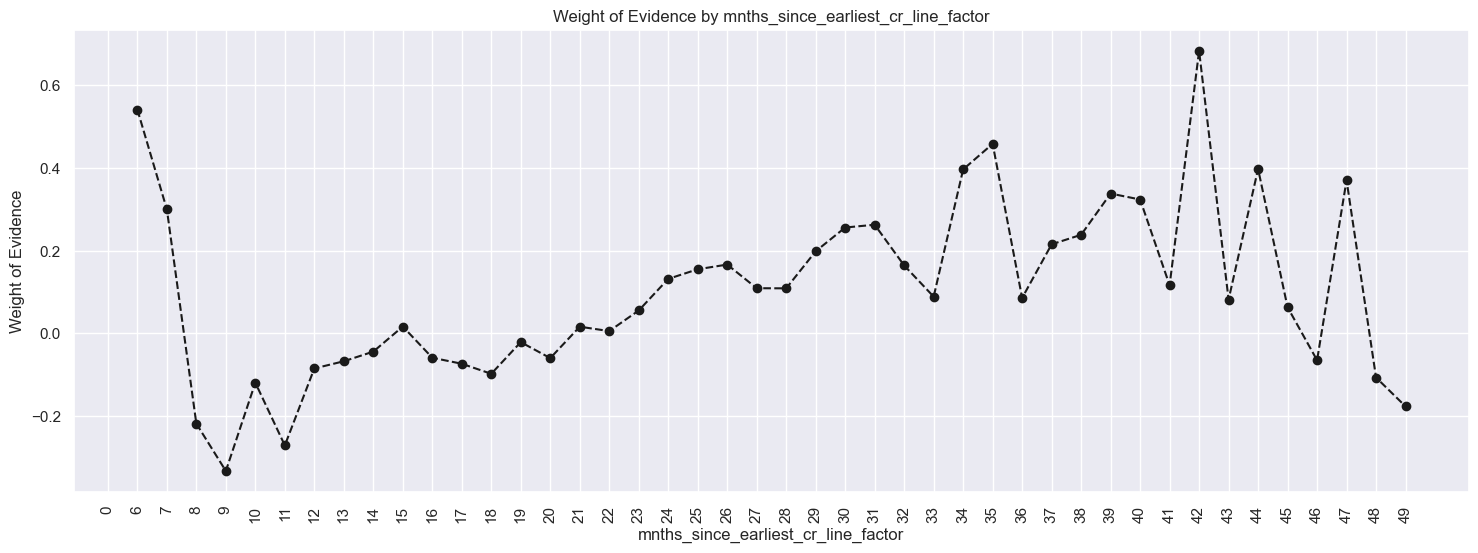

In [141]:
plot_by_woe(df_temp,90)

In [142]:
df_input_prepr["mnths_since_earliest_cr_line:<140"]    = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(140)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:141-164"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(140,165)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:165-247"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(165,248)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:247-270"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(248,271)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:271-352"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(271,353)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:>352"]    = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(353,int(df_input_prepr["mnths_since_earliest_cr_line"].max()))),1,0)


##### installment_factor

In [144]:

##fine classing the variable into 50 categories
df_input_prepr["installment_factor"] = pd.cut( df_input_prepr["installment"],bins = 50,
                                               labels=False, 
                                               include_lowest=True )


df_temp = woe_continuous(df_input_prepr,"installment_factor",df_target_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,485,0.884536,0.005201,429.0,56.0,0.005060,0.006612,-0.267636,inf
1,1,1246,0.912520,0.013361,1137.0,109.0,0.013410,0.012870,0.041059,inf
2,2,1731,0.908146,0.018562,1572.0,159.0,0.018540,0.018774,-0.012542,inf
3,3,2292,0.913613,0.024577,2094.0,198.0,0.024697,0.023379,0.054823,inf
4,4,2602,0.904304,0.027901,2353.0,249.0,0.027752,0.029401,-0.057748,inf
5,5,4133,0.914590,0.044318,3780.0,353.0,0.044582,0.041681,0.067270,inf
6,6,4109,0.917255,0.044061,3769.0,340.0,0.044452,0.040146,0.101878,inf
7,7,3730,0.915550,0.039997,3415.0,315.0,0.040277,0.037194,0.079619,inf
8,8,4660,0.922103,0.049969,4297.0,363.0,0.050679,0.042862,0.167528,inf
9,9,4975,0.909347,0.053347,4524.0,451.0,0.053357,0.053253,0.001943,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

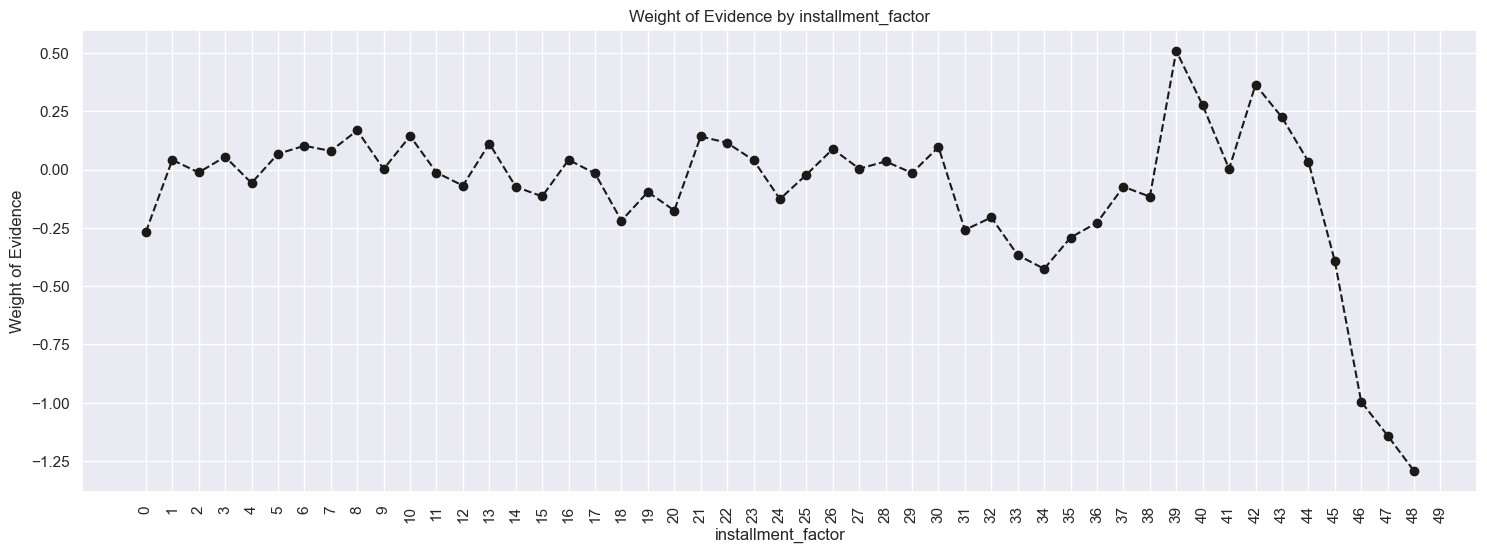

In [145]:
plot_by_woe(df_temp,90)

##### delinq_2yrs

In [147]:
##fine classing the variable into 50 categories
df_input_prepr["delinq_2yrs_factor"] = pd.cut( df_input_prepr["delinq_2yrs"],bins = 50,
                                               labels=False, 
                                               include_lowest=True )


df_temp = woe_continuous(df_input_prepr,"delinq_2yrs_factor",df_target_prepr)
df_temp

,delinq_2yrs_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,76566,0.908301,0.821021,69545.0,7021.0,0.820222,0.829023,-0.010673,inf
1,2,11297,0.912809,0.121138,10312.0,985.0,0.121621,0.116307,0.044680,inf
2,5,3192,0.911654,0.034228,2910.0,282.0,0.034321,0.033298,0.030260,inf
3,7,1134,0.918871,0.012160,1042.0,92.0,0.012289,0.010863,0.123367,inf
4,10,510,0.909804,0.005469,464.0,46.0,0.005472,0.005432,0.007502,inf
5,13,270,0.929630,0.002895,251.0,19.0,0.002960,0.002243,0.277272,inf
6,15,128,0.890625,0.001373,114.0,14.0,0.001345,0.001653,-0.206600,inf
7,18,67,0.925373,0.000718,62.0,5.0,0.000731,0.000590,0.213955,inf
8,21,29,0.896552,0.000311,26.0,3.0,0.000307,0.000354,-0.144257,inf
9,23,22,1.000000,0.000236,22.0,0.0,0.000259,0.000000,inf,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

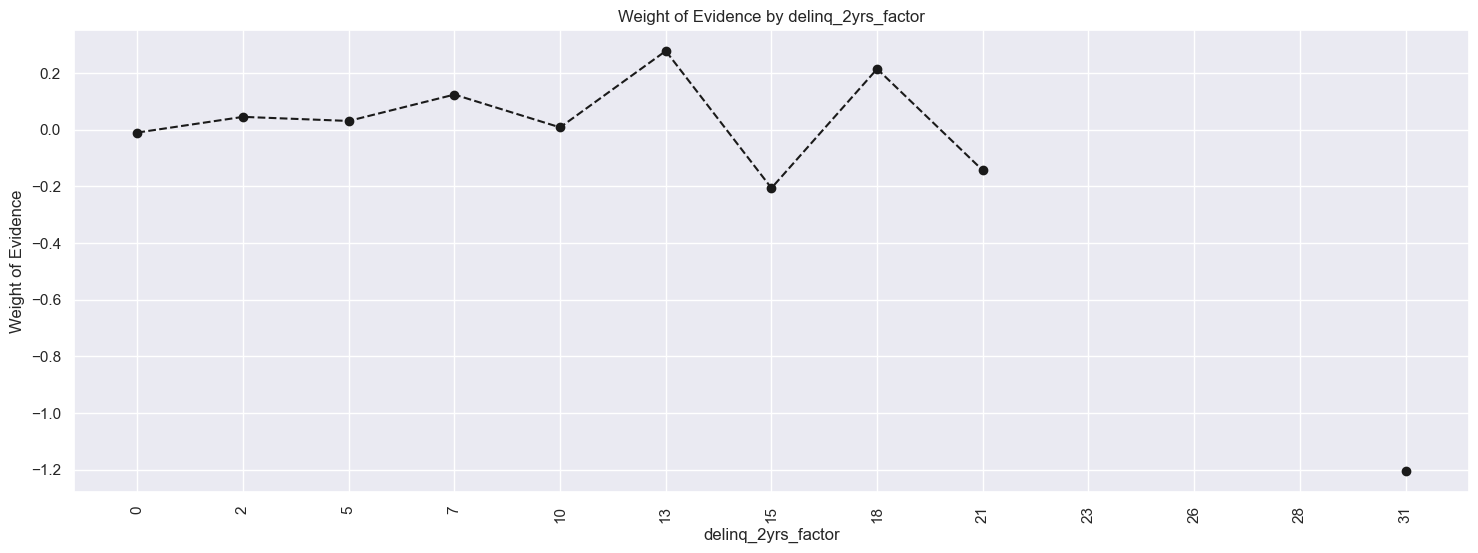

In [148]:
plot_by_woe(df_temp,90)

In [149]:
df_input_prepr["delinq_2yrs:0"] = np.where(df_input_prepr["delinq_2yrs"] == 0 ,1,0)
df_input_prepr["delinq_2yrs:1-3"] = np.where((df_input_prepr["delinq_2yrs"] >= 1) & (df_input_prepr["delinq_2yrs"] <= 3),1,0)
df_input_prepr["delinq_2yrs:>=4"] = np.where((df_input_prepr["delinq_2yrs"] >= 4),1,0)


##### inq_last_6mths

In [151]:
df_temp = woe_continuous(df_input_prepr,"inq_last_6mths",df_target_prepr)
df_temp


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,48295,0.925748,0.517870,44709.0,3586.0,0.527303,0.423427,0.219396,inf
1,1.0,25985,0.901636,0.278639,23429.0,2556.0,0.276324,0.301807,-0.088211,inf
2,2.0,11611,0.880286,0.124505,10221.0,1390.0,0.120548,0.164128,-0.308601,inf
3,3.0,5086,0.862564,0.054537,4387.0,699.0,0.051741,0.082536,-0.466991,inf
4,4.0,1431,0.890985,0.015345,1275.0,156.0,0.015038,0.018420,-0.202896,inf
5,5.0,551,0.911071,0.005908,502.0,49.0,0.005921,0.005786,0.023038,inf
6,6.0,211,0.867299,0.002263,183.0,28.0,0.002158,0.003306,-0.426460,inf
7,7.0,36,0.888889,0.000386,32.0,4.0,0.000377,0.000472,-0.224300,inf
8,8.0,21,0.952381,0.000225,20.0,1.0,0.000236,0.000118,0.691991,inf
9,9.0,7,1.000000,0.000075,7.0,0.0,0.000083,0.000000,inf,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

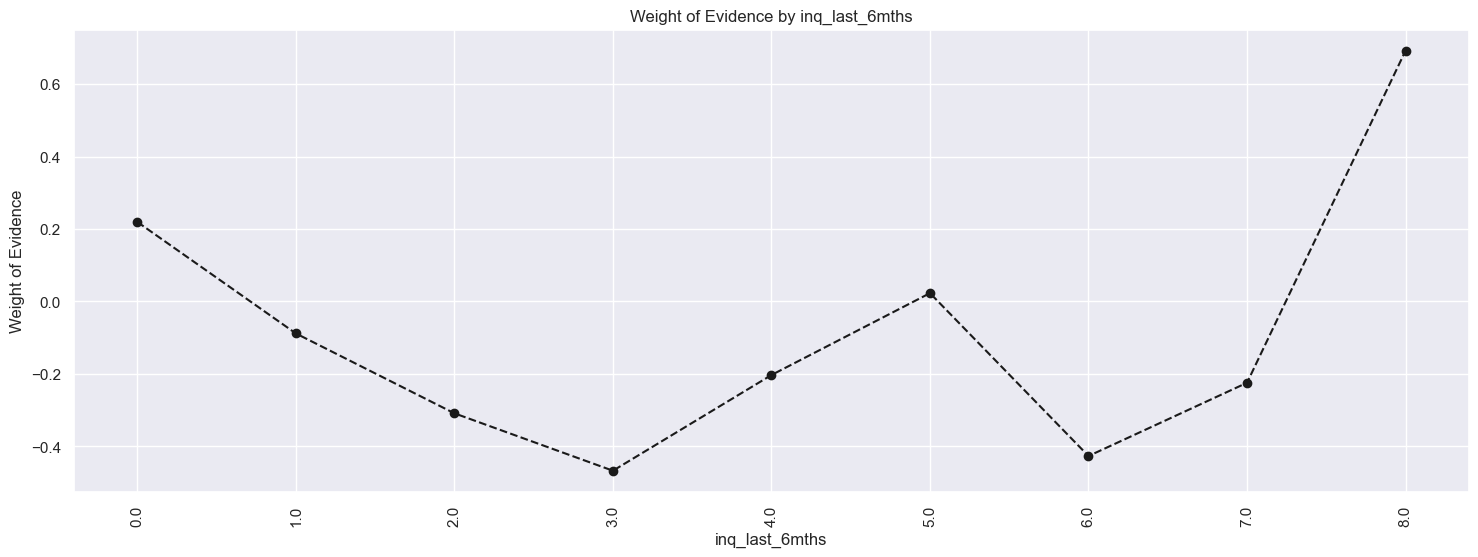

In [152]:
plot_by_woe(df_temp,90)

In [153]:
df_input_prepr["inq_last_6mths:0"] = np.where(df_input_prepr["inq_last_6mths"] == 0 ,1,0)
df_input_prepr["inq_last_6mths:1-2"] = np.where((df_input_prepr["inq_last_6mths"] >= 1) & (df_input_prepr["inq_last_6mths"] <= 2),1,0)
df_input_prepr["inq_last_6mths:3-6"] = np.where((df_input_prepr["inq_last_6mths"] >= 3) & (df_input_prepr["inq_last_6mths"] <= 6),1,0)
df_input_prepr["inq_last_6mths:>6"] = np.where((df_input_prepr["inq_last_6mths"] > 6),1,0)

##### open_acc

In [155]:
df_temp = woe_continuous(df_input_prepr,"open_acc",df_target_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000083,0.000000,inf,inf
1,1.0,32,1.000000,0.000343,32.0,0.0,0.000377,0.000000,inf,inf
2,2.0,334,0.847305,0.003582,283.0,51.0,0.003338,0.006022,-0.590120,inf
3,3.0,1122,0.872549,0.012031,979.0,143.0,0.011546,0.016885,-0.380055,inf
4,4.0,2560,0.906641,0.027451,2321.0,239.0,0.027374,0.028221,-0.030452,inf
5,5.0,4403,0.906882,0.047214,3993.0,410.0,0.047094,0.048412,-0.027601,inf
6,6.0,6216,0.905888,0.066655,5631.0,585.0,0.066413,0.069075,-0.039311,inf
7,7.0,7433,0.904076,0.079704,6720.0,713.0,0.079256,0.084189,-0.060380,inf
8,8.0,8314,0.911475,0.089151,7578.0,736.0,0.089376,0.086905,0.028033,inf
9,9.0,8768,0.907505,0.094020,7957.0,811.0,0.093846,0.095761,-0.020202,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

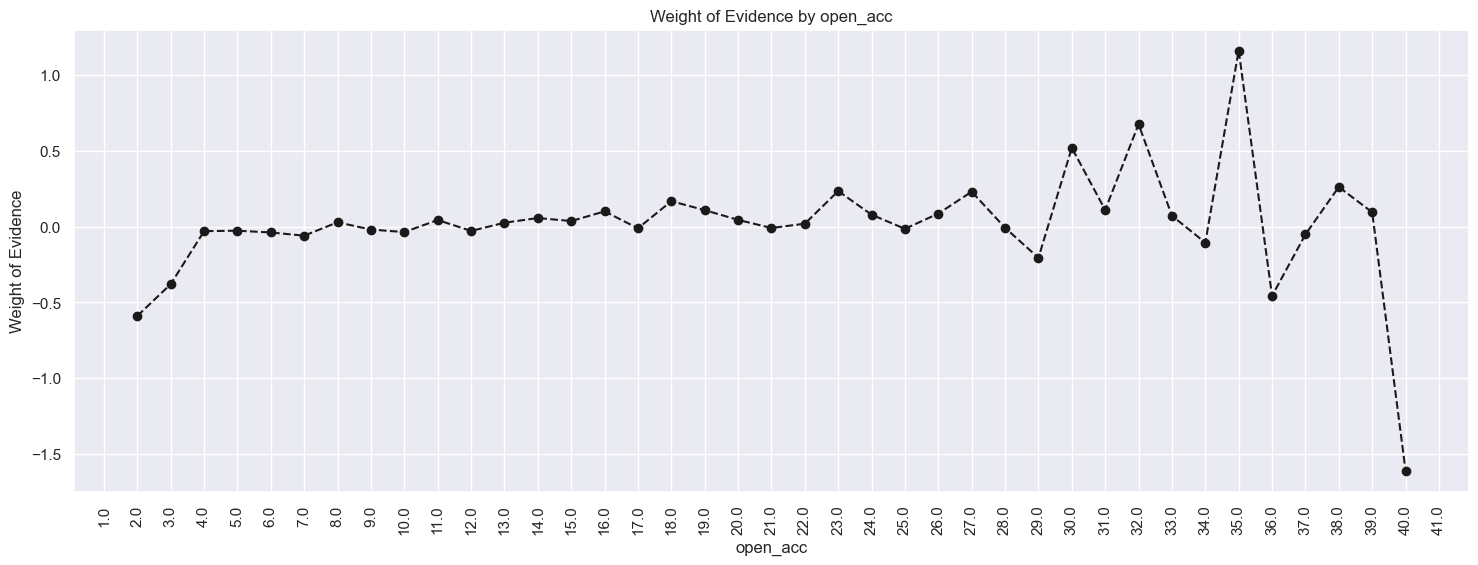

In [156]:
plot_by_woe(df_temp,90)

In [157]:
df_input_prepr["open_acc:0"] = np.where(df_input_prepr["open_acc"] == 0 ,1,0)
df_input_prepr["open_acc:1-3"] = np.where((df_input_prepr["open_acc"] >= 1) & (df_input_prepr["open_acc"] <= 3),1,0)
df_input_prepr["open_acc:4-12"] = np.where((df_input_prepr["open_acc"] >= 4) & (df_input_prepr["open_acc"] <= 12),1,0)
df_input_prepr["open_acc:13-17"] = np.where((df_input_prepr["open_acc"] >= 13) & (df_input_prepr["open_acc"] <= 17),1,0)
df_input_prepr["open_acc:18-22"] = np.where((df_input_prepr["open_acc"] >= 18) & (df_input_prepr["open_acc"] <= 22),1,0)
df_input_prepr["open_acc:23-25"] = np.where((df_input_prepr["open_acc"] >= 23) & (df_input_prepr["open_acc"] <= 25),1,0)
df_input_prepr["open_acc:26-30"] = np.where((df_input_prepr["open_acc"] >= 26) & (df_input_prepr["open_acc"] <= 30),1,0)
df_input_prepr["open_acc:>30"] = np.where((df_input_prepr["open_acc"] > 30),1,0)

##### pub_rec

In [159]:
df_temp = woe_continuous(df_input_prepr,"pub_rec",df_target_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,80923,0.907295,0.867742,73421.0,7502.0,0.865936,0.885819,-0.022701,inf
1,1.0,10670,0.921275,0.114415,9830.0,840.0,0.115936,0.099185,0.156051,inf
2,2.0,1097,0.927985,0.011763,1018.0,79.0,0.012006,0.009328,0.252406,inf
3,3.0,331,0.927492,0.003549,307.0,24.0,0.003621,0.002834,0.245052,inf
4,4.0,112,0.866071,0.001201,97.0,15.0,0.001144,0.001771,-0.437081,inf
5,5.0,73,0.917808,0.000783,67.0,6.0,0.000790,0.000708,0.109192,inf
6,6.0,19,1.000000,0.000204,19.0,0.0,0.000224,0.000000,inf,inf
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000130,0.000354,-1.004459,inf
8,8.0,5,1.000000,0.000054,5.0,0.0,0.000059,0.000000,inf,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

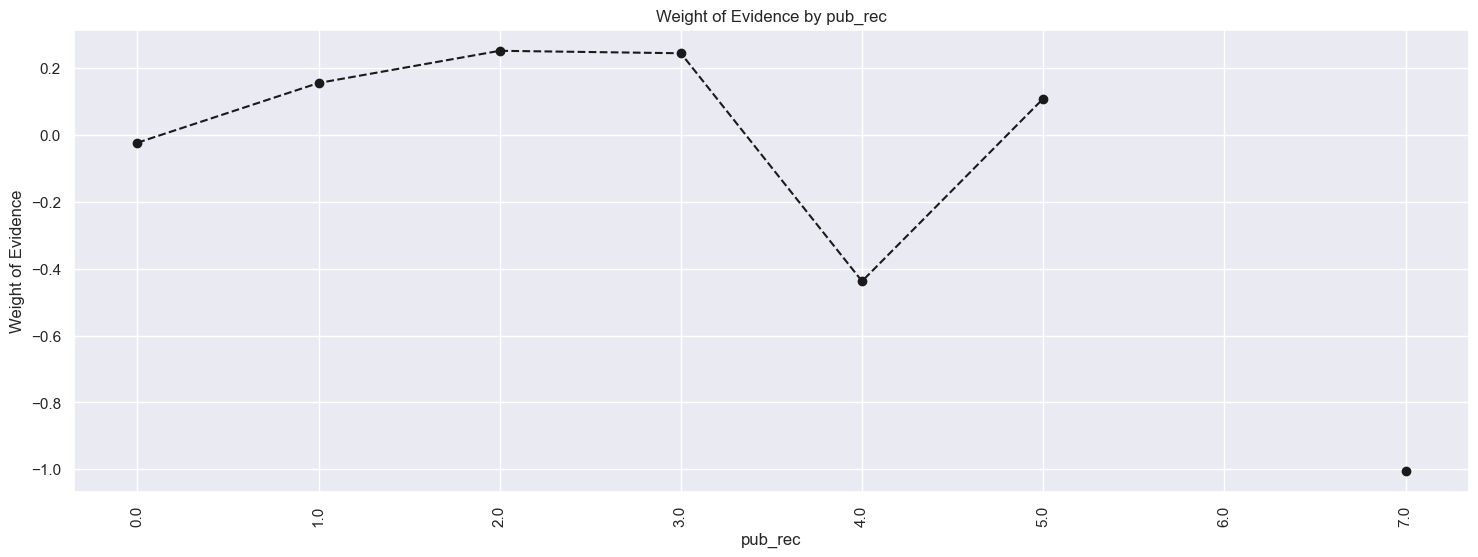

In [160]:
plot_by_woe(df_temp,90)

In [161]:
df_input_prepr["pub_rec:0"]   = np.where(df_input_prepr["pub_rec"] == 0 ,1,0)
df_input_prepr["pub_rec:1-2"] = np.where((df_input_prepr["pub_rec"] >= 1) & (df_input_prepr["pub_rec"] <= 2),1,0)
df_input_prepr["pub_rec:3-4"] = np.where((df_input_prepr["pub_rec"] >= 3) & (df_input_prepr["pub_rec"] <= 4),1,0)
df_input_prepr["pub_rec:>=5"] = np.where((df_input_prepr["pub_rec"] >=5),1,0)

##### total_acc

In [163]:
##fine classing the variable into 50 categories
df_input_prepr["total_acc_factor"] = pd.cut( df_input_prepr["total_acc"],
                                             bins = 50,
                                             labels=False, 
                                             include_lowest=True )

                                             

df_temp = woe_continuous(df_input_prepr,"total_acc_factor",df_target_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,125,0.824000,0.001340,103.0,22.0,0.001215,0.002598,-0.760055,inf
1,1,1499,0.877252,0.016074,1315.0,184.0,0.015509,0.021726,-0.337085,inf
2,2,3715,0.889367,0.039836,3304.0,411.0,0.038968,0.048530,-0.219446,inf
3,3,6288,0.895674,0.067427,5632.0,656.0,0.066424,0.077459,-0.153682,inf
4,4,8289,0.907106,0.088883,7519.0,770.0,0.088680,0.090920,-0.024944,inf
5,5,9843,0.906939,0.105547,8927.0,916.0,0.105286,0.108159,-0.026922,inf
6,6,10270,0.910224,0.110126,9348.0,922.0,0.110251,0.108868,0.012631,inf
7,7,9971,0.910841,0.106920,9082.0,889.0,0.107114,0.104971,0.020211,inf
8,8,11873,0.911059,0.127315,10817.0,1056.0,0.127577,0.124690,0.022889,inf
9,9,7289,0.910001,0.078160,6633.0,656.0,0.078230,0.077459,0.009910,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

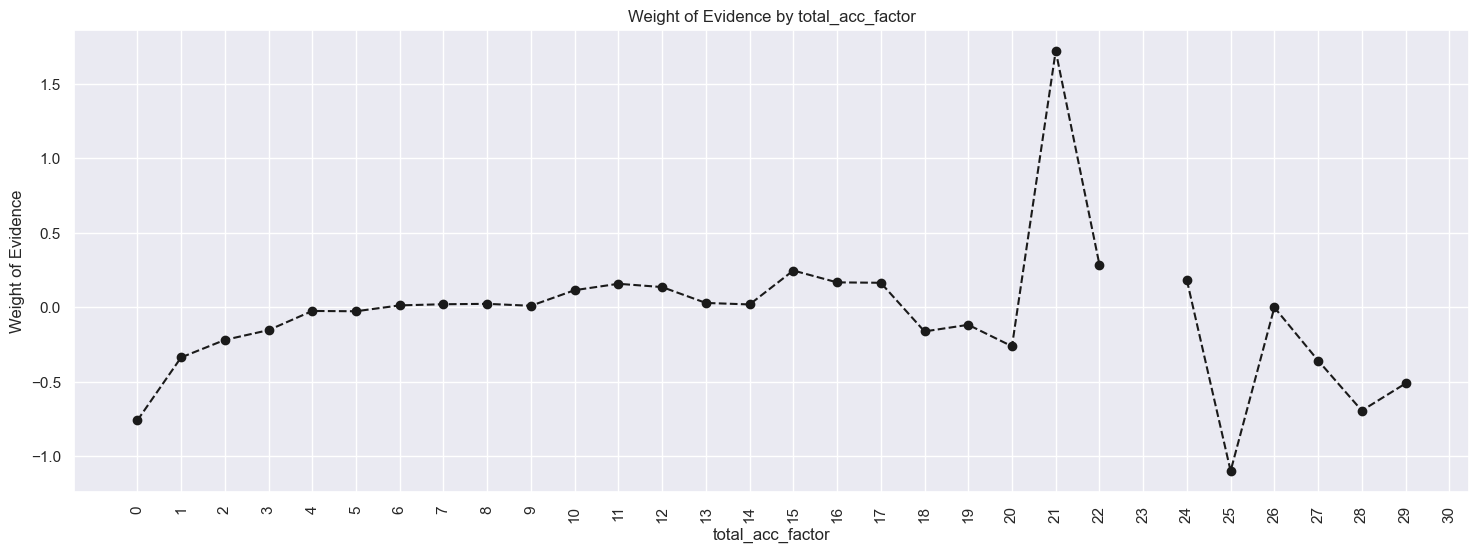

In [164]:
plot_by_woe(df_temp,90)

In [165]:
df_input_prepr["total_acc:<=27"]   = np.where(df_input_prepr["total_acc"] <=27 ,1,0)
df_input_prepr["total_acc:28 - 51"] = np.where((df_input_prepr["total_acc"] >= 28) & (df_input_prepr["total_acc"] <= 51),1,0)
df_input_prepr["total_acc:>=52"] = np.where((df_input_prepr["total_acc"] >=52),1,0)

##### acc_now_delinq

In [167]:
df_temp = woe_continuous(df_input_prepr,"acc_now_delinq",df_target_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,92871,0.909164,0.995861,84435.0,8436.0,0.995837,0.996103,-0.000268,0.000133
1,1.0,360,0.916667,0.003860,330.0,30.0,0.003892,0.003542,0.094154,0.000133
2,2.0,22,0.909091,0.000236,20.0,2.0,0.000236,0.000236,-0.001156,0.000133
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000035,0.000118,-1.205129,0.000133


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

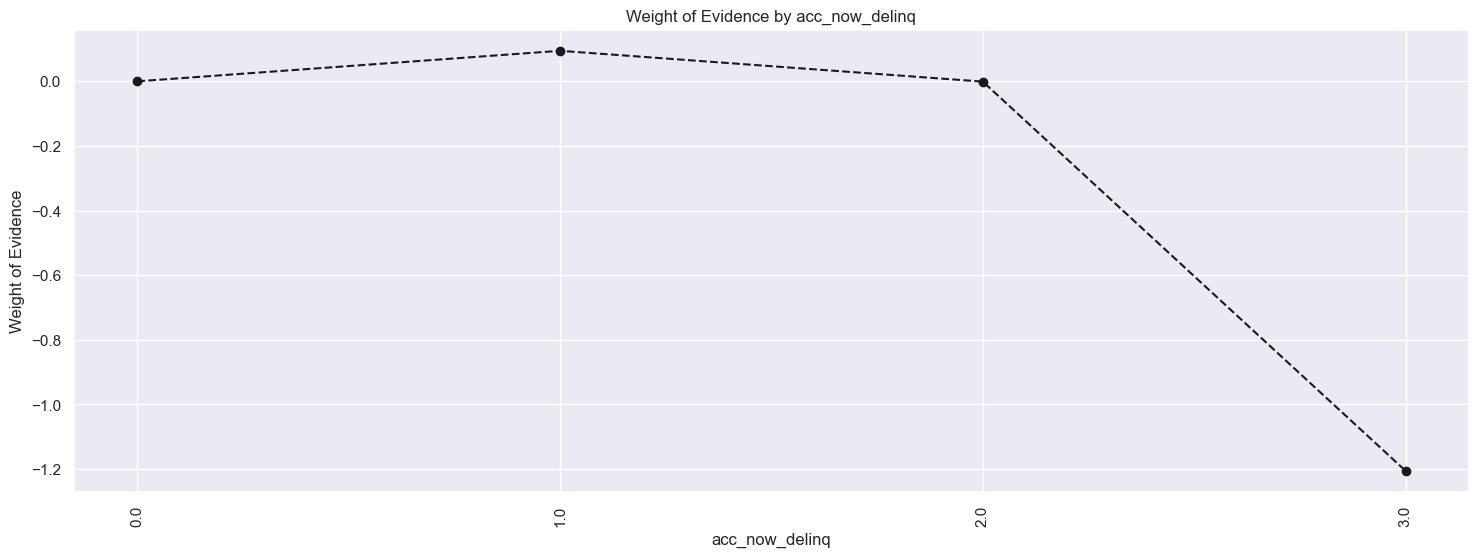

In [168]:
plot_by_woe(df_temp,90)

In [169]:
df_input_prepr["acc_now_delinq:0"]   = np.where((df_input_prepr["acc_now_delinq"]) == 0 ,1,0)
df_input_prepr["acc_now_delinq:>=1"] = np.where((df_input_prepr["acc_now_delinq"] >=1),1,0)


##### annual_inc

In [171]:
df_input_prepr_temp = df_input_prepr.loc[df_input_prepr["annual_inc"] <= 140000, :].copy()

In [172]:
df_input_prepr_temp["annual_inc_factor"] = pd.cut( df_input_prepr_temp["annual_inc"],
                                             bins = 50,
                                             labels=False, 
                                             include_lowest=True )


df_temp = woe_continuous(df_input_prepr_temp,"annual_inc_factor",df_target_prepr[df_input_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,10,1.000000,0.000114,10.0,0.0,0.000126,0.000000,inf,inf
1,1,84,0.797619,0.000958,67.0,17.0,0.000842,0.002082,-0.904883,inf
2,2,123,0.821138,0.001403,101.0,22.0,0.001270,0.002695,-0.752284,inf
3,3,304,0.878289,0.003467,267.0,37.0,0.003357,0.004532,-0.300032,inf
4,4,383,0.845953,0.004368,324.0,59.0,0.004074,0.007227,-0.573156,inf
5,5,733,0.870396,0.008359,638.0,95.0,0.008022,0.011636,-0.371901,inf
6,6,704,0.875000,0.008028,616.0,88.0,0.007746,0.010779,-0.330452,inf
7,7,1785,0.878992,0.020356,1569.0,216.0,0.019729,0.026458,-0.293447,inf
8,8,1355,0.869373,0.015452,1178.0,177.0,0.014813,0.021681,-0.380939,inf
9,9,2292,0.874346,0.026137,2004.0,288.0,0.025199,0.035277,-0.336422,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

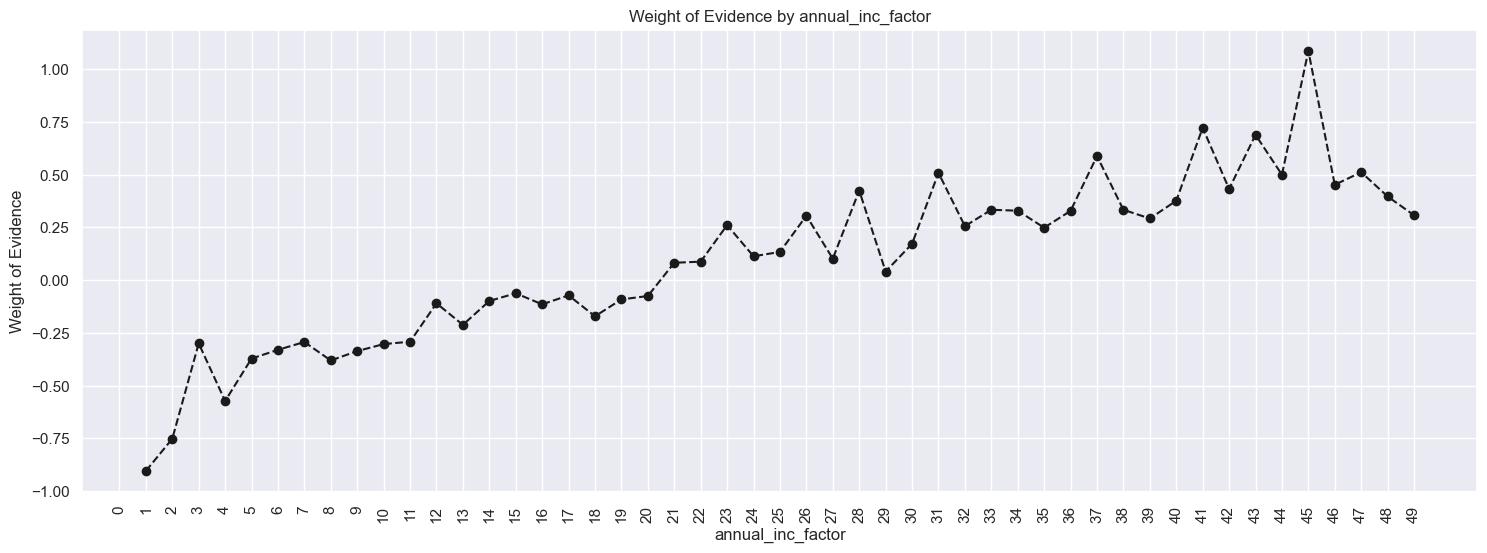

In [173]:
plot_by_woe(df_temp,90)

In [174]:
df_input_prepr["annual_inc:<=20000"]   = np.where(df_input_prepr["annual_inc"] <=20000 ,1,0)
df_input_prepr["annual_inc:20000-30000"] = np.where((df_input_prepr["annual_inc"] > 20000) & (df_input_prepr["annual_inc"] <= 30000),1,0)
df_input_prepr["annual_inc:30000-40000"] = np.where((df_input_prepr["annual_inc"] > 30000) & (df_input_prepr["annual_inc"] <= 40000),1,0)
df_input_prepr["annual_inc:40000-50000"] = np.where((df_input_prepr["annual_inc"] > 40000) & (df_input_prepr["annual_inc"] <= 50000),1,0)
df_input_prepr["annual_inc:50000-60000"] = np.where((df_input_prepr["annual_inc"] > 50000) & (df_input_prepr["annual_inc"] <= 60000),1,0)
df_input_prepr["annual_inc:60000-70000"] = np.where((df_input_prepr["annual_inc"] > 60000) & (df_input_prepr["annual_inc"] <= 70000),1,0)
df_input_prepr["annual_inc:70000-80000"] = np.where((df_input_prepr["annual_inc"] > 70000) & (df_input_prepr["annual_inc"] <= 80000),1,0)
df_input_prepr["annual_inc:80000-90000"] = np.where((df_input_prepr["annual_inc"] > 80000) & (df_input_prepr["annual_inc"] <= 90000),1,0)
df_input_prepr["annual_inc:90000-100000"] = np.where((df_input_prepr["annual_inc"] > 90000) & (df_input_prepr["annual_inc"] <= 100000),1,0)
df_input_prepr["annual_inc:100000-120000"] = np.where((df_input_prepr["annual_inc"] > 100000) & (df_input_prepr["annual_inc"] <= 120000),1,0)
df_input_prepr["annual_inc:120000-140000"] = np.where((df_input_prepr["annual_inc"] > 120000) & (df_input_prepr["annual_inc"] <= 140000),1,0)
df_input_prepr["annual_inc:>140000"] = np.where((df_input_prepr["annual_inc"] > 140000),1,0)


##### mths_since_last_delinq

In [176]:
df_input_prepr_temp = df_input_prepr[pd.notnull(df_input_prepr["mths_since_last_delinq"])].copy()

In [177]:
df_input_prepr_temp["mths_since_last_delinq_factor"] = pd.cut( df_input_prepr_temp["mths_since_last_delinq"],
                                                               bins = 50,
                                                               labels=False, 
                                                               include_lowest=True )


df_temp = woe_continuous(df_input_prepr_temp,"mths_since_last_delinq_factor",df_target_prepr[df_input_prepr_temp.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,1348,0.911721,0.031283,1229.0,119.0,0.031285,0.031258,0.000857,inf
1,1,1890,0.908995,0.043861,1718.0,172.0,0.043733,0.045180,-0.032554,inf
2,2,3373,0.911058,0.078276,3073.0,300.0,0.078225,0.078802,-0.007349,inf
3,3,2496,0.917067,0.057924,2289.0,207.0,0.058268,0.054374,0.069176,inf
4,4,3165,0.910900,0.073449,2883.0,282.0,0.073389,0.074074,-0.009296,inf
5,5,2282,0.914110,0.052958,2086.0,196.0,0.053100,0.051484,0.030913,inf
6,6,2115,0.915366,0.049082,1936.0,179.0,0.049282,0.047019,0.047018,inf
7,7,2755,0.911434,0.063934,2511.0,244.0,0.063919,0.064092,-0.002708,inf
8,8,1929,0.911353,0.044766,1758.0,171.0,0.044751,0.044917,-0.003707,inf
9,9,2453,0.913168,0.056926,2240.0,213.0,0.057021,0.055950,0.018963,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

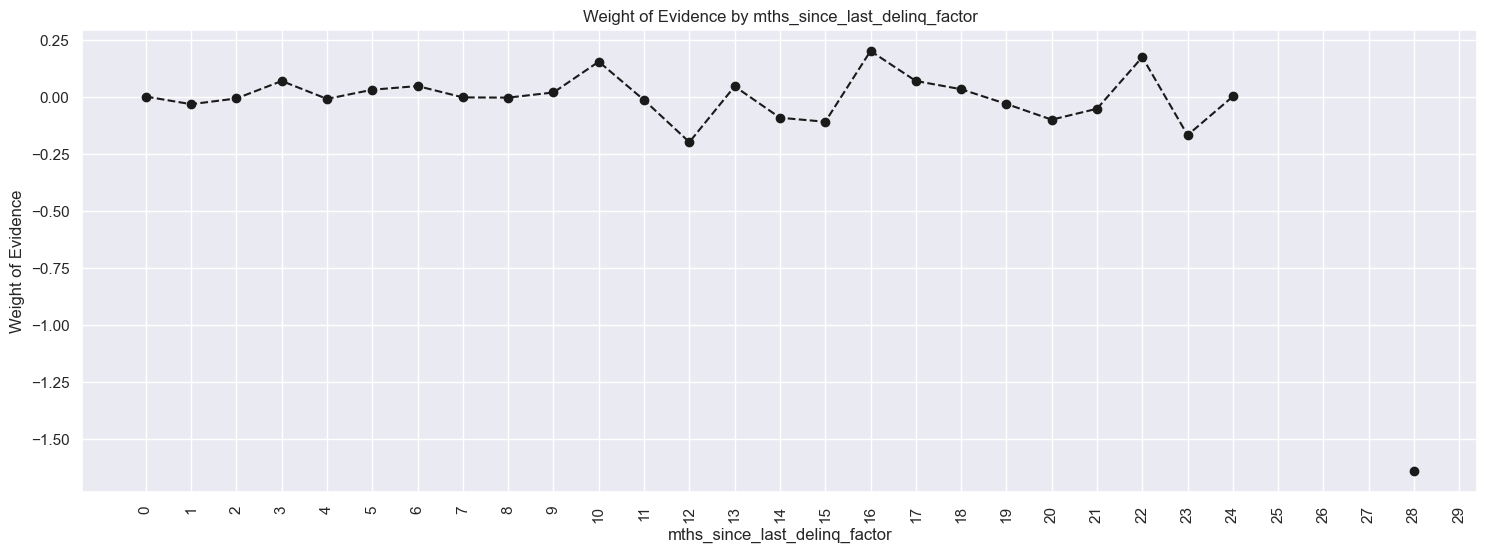

In [178]:
plot_by_woe(df_temp,90)

In [179]:
df_input_prepr["mths_since_last_delinq:0-3"] = np.where((df_input_prepr["mths_since_last_delinq"] >= 0) & (df_input_prepr["mths_since_last_delinq"] <= 3),1,0)
df_input_prepr["mths_since_last_delinq:4-29"] = np.where((df_input_prepr["mths_since_last_delinq"] >= 4) & (df_input_prepr["mths_since_last_delinq"] <= 29),1,0)
df_input_prepr["mths_since_last_delinq:>=29"] = np.where((df_input_prepr["mths_since_last_delinq"] >= 29),1,0)

##### dti

In [181]:
df_input_prepr["dti"].unique()

array([ 9.32, 24.19, 13.34, ..., 37.86, 36.4 , 36.91])

In [182]:
df_input_prepr["dti_factor"] = pd.cut( df_input_prepr["dti"],
                                      bins = 50,
                                      labels=False, 
                                      include_lowest=True )

df_temp = woe_continuous(df_input_prepr,"dti_factor",df_target_prepr)
df_temp

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\3540602616.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr["dti_factor"] = pd.cut( df_input_prepr["dti"],


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,371,0.913747,0.003978,339.0,32.0,0.003998,0.003778,0.056523,0.030649
1,1,478,0.914226,0.005126,437.0,41.0,0.005154,0.004841,0.062620,0.030649
2,2,639,0.915493,0.006852,585.0,54.0,0.006900,0.006376,0.078886,0.030649
3,3,808,0.925743,0.008664,748.0,60.0,0.008822,0.007085,0.219317,0.030649
4,4,1047,0.930277,0.011227,974.0,73.0,0.011487,0.008620,0.287210,0.030649
5,5,1260,0.922222,0.013511,1162.0,98.0,0.013705,0.011572,0.169189,0.030649
6,6,1527,0.929273,0.016374,1419.0,108.0,0.016736,0.012752,0.271835,0.030649
7,7,1730,0.920809,0.018551,1593.0,137.0,0.018788,0.016177,0.149652,0.030649
8,8,1999,0.935468,0.021435,1870.0,129.0,0.022055,0.015232,0.370140,0.030649
9,9,2227,0.926358,0.023880,2063.0,164.0,0.024331,0.019365,0.228308,0.030649


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

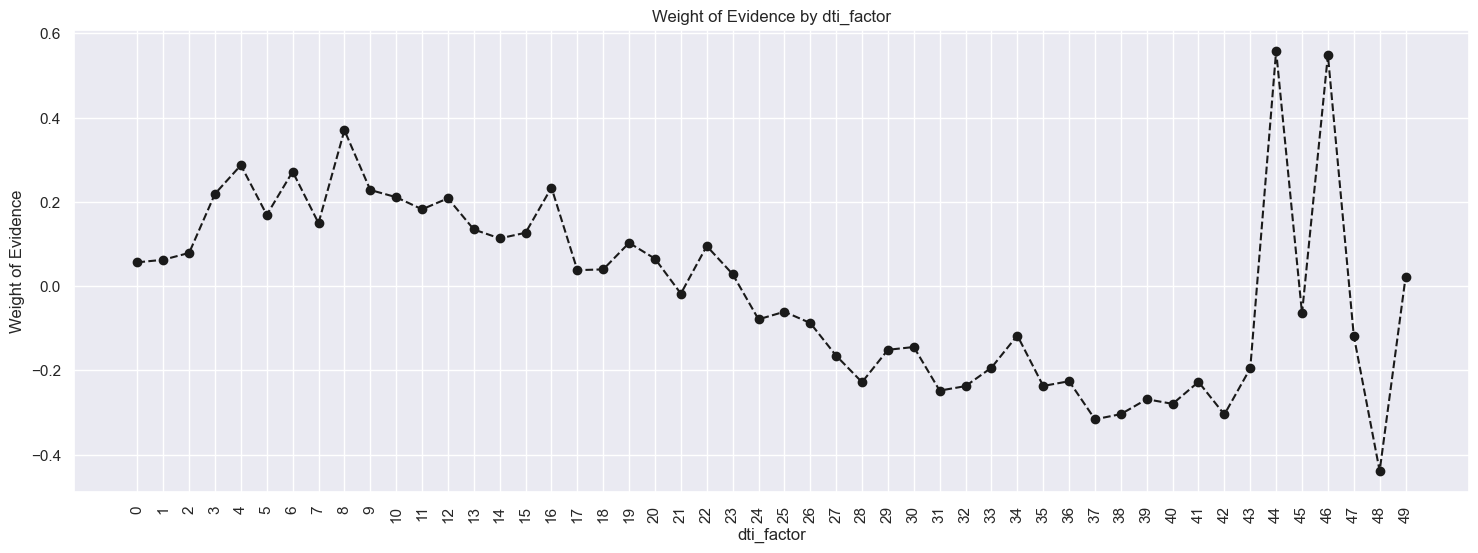

In [183]:
plot_by_woe(df_temp,90)

In [184]:
df_input_prepr["dti:0-1"] = np.where((df_input_prepr["dti"] >= 0) & (df_input_prepr["dti"] <= 1),1,0)
df_input_prepr["dti:2-12"] = np.where((df_input_prepr["dti"] >= 2) & (df_input_prepr["dti"] <= 12),1,0)
df_input_prepr["dti:13-17"] = np.where((df_input_prepr["dti"] >= 13) & (df_input_prepr["dti"] <= 17),1,0)
df_input_prepr["dti:18-30"] = np.where((df_input_prepr["dti"] >= 18) & (df_input_prepr["dti"] <= 30),1,0)
df_input_prepr["dti:31-43"] = np.where((df_input_prepr["dti"] >= 31) & (df_input_prepr["dti"] <= 43),1,0)
df_input_prepr["dti:>43"] = np.where((df_input_prepr["dti"] > 43),1,0)

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\2204987340.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr["dti:0-1"] = np.where((df_input_prepr["dti"] >= 0) & (df_input_prepr["dti"] <= 1),1,0)
C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\2204987340.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr["dti:2-12"] = np.where((df_input_prepr["dti"] >= 2) & (df_input_prepr["dti"] <= 12),1,0)
C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\2204987340.py:3:

##### mths_since_last_record

In [186]:
##fine classing the variable into 50 categories
df_input_prepr["mths_since_last_record_factor"] = pd.cut( df_input_prepr["mths_since_last_record"],
                                             bins = 50,
                                             labels=False, 
                                             include_lowest=True )

                                             

df_temp = woe_continuous(df_input_prepr,"mths_since_last_record_factor",df_target_prepr)
df_temp

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\1927696866.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr["mths_since_last_record_factor"] = pd.cut( df_input_prepr["mths_since_last_record"],
C:\Users\shachini dinushika\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,244,0.881148,0.019410,215.0,29.0,0.018573,0.029146,-0.450604,inf
1,1.0,36,0.944444,0.002864,34.0,2.0,0.002937,0.002010,0.379267,inf
2,2.0,39,0.974359,0.003102,38.0,1.0,0.003283,0.001005,1.183640,inf
3,3.0,66,0.939394,0.005250,62.0,4.0,0.005356,0.004020,0.286893,inf
4,4.0,42,0.904762,0.003341,38.0,4.0,0.003283,0.004020,-0.202655,inf
5,5.0,69,0.913043,0.005489,63.0,6.0,0.005442,0.006030,-0.102571,inf
6,6.0,95,0.884211,0.007557,84.0,11.0,0.007256,0.011055,-0.421025,inf
7,7.0,58,0.982759,0.004614,57.0,1.0,0.004924,0.001005,1.589105,inf
8,8.0,101,0.910891,0.008034,92.0,9.0,0.007947,0.009045,-0.129383,inf
9,9.0,94,0.968085,0.007478,91.0,3.0,0.007861,0.003015,0.958301,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

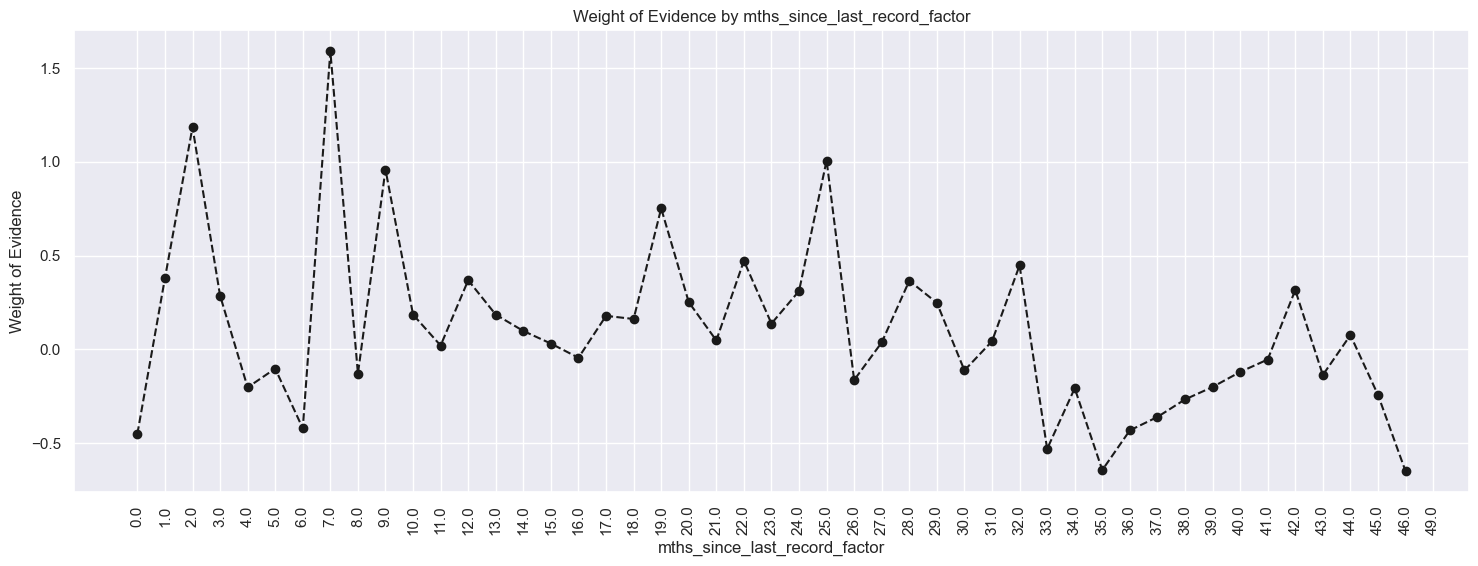

In [187]:
plot_by_woe(df_temp,90)

In [188]:
df_input_prepr["mths_since_last_record:0-5"] = np.where((df_input_prepr["mths_since_last_record"] >= 0) & (df_input_prepr["mths_since_last_record"] <= 5),1,0)
df_input_prepr["mths_since_last_record:6-9"] = np.where((df_input_prepr["mths_since_last_record"] >= 6) & (df_input_prepr["mths_since_last_record"] <= 9),1,0)
df_input_prepr["mths_since_last_record:10-14"] = np.where((df_input_prepr["mths_since_last_record"] >= 10) & (df_input_prepr["mths_since_last_record"] <= 14),1,0)
df_input_prepr["mths_since_last_record:15-17"] = np.where((df_input_prepr["mths_since_last_record"] >= 15) & (df_input_prepr["mths_since_last_record"] <= 17),1,0)
df_input_prepr["mths_since_last_record:18-21"] = np.where((df_input_prepr["mths_since_last_record"] >= 18) & (df_input_prepr["mths_since_last_record"] <= 21),1,0)
df_input_prepr["mths_since_last_record:22-25"] = np.where((df_input_prepr["mths_since_last_record"] >= 22) & (df_input_prepr["mths_since_last_record"] <= 25),1,0)
df_input_prepr["mths_since_last_record:25-30"] = np.where((df_input_prepr["mths_since_last_record"] >= 26) & (df_input_prepr["mths_since_last_record"] <= 30),1,0)
df_input_prepr["mths_since_last_record:31-35"] = np.where((df_input_prepr["mths_since_last_record"] >= 31) & (df_input_prepr["mths_since_last_record"] <= 35),1,0)
df_input_prepr["mths_since_last_record:36-40"] = np.where((df_input_prepr["mths_since_last_record"] >= 36) & (df_input_prepr["mths_since_last_record"] <= 40),1,0)
df_input_prepr["mths_since_last_record:>40"] = np.where((df_input_prepr["mths_since_last_record"] > 40),1,0)

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\1749858532.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr["mths_since_last_record:0-5"] = np.where((df_input_prepr["mths_since_last_record"] >= 0) & (df_input_prepr["mths_since_last_record"] <= 5),1,0)
C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8956\1749858532.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr["mths_since_last_record:6-9"] = np.where((df_input_prepr["mths_since_last_record"] >= 6) & (df_input_prepr["mt

In [189]:
loan_data_inputs_test = df_input_prepr

In [190]:
loan_data_inputs_test.shape
loan_data_inputs_train.shape

(373028, 206)

In [192]:
####writing  to files####
#loan_data_inputs_train.to_csv(r'C:\Users\sajayawardena\Documents\Data\loan_data_inputs_train.csv')
#loan_data_inputs_test.to_csv(r'C:\Users\sajayawardena\Documents\Data\loan_data_inputs_test.csv')
#loan_data_targets_train.to_csv(r'C:\Users\sajayawardena\Documents\Data\loan_data_targets_train.csv')
#loan_data_targets_test.to_csv(r'C:\Users\sajayawardena\Documents\Data\loan_data_targets_test.csv')


In [ ]:
#Data Exploration

In [ ]:
#Data Visualization

In [ ]:
#Model 

In [ ]:
#Prediction

In [ ]:
#Validation